## Предобработка

In [ ]:
df_c = pd.read_csv('/content/drive/MyDrive/PARSCIAN.csv', sep = ',')
df_c.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


In [ ]:
# выводим размер дф
df_c.shape

(8393, 27)

In [ ]:
df_c = df_c.drop_duplicates()

In [ ]:
# выводим размер дф ещё раз
df_c.shape

(7577, 27)

В дф 7577 строчки и 27 колонок. Первые две колонки сразу удаляем, так как они не нужны для анализа, после чего выводим информацию о датасете

In [ ]:
df_c.drop(['author', 'author_type'], axis=1, inplace=True)

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7577 entries, 0 to 8392
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   7576 non-null   object
 1   location              7576 non-null   object
 2   deal_type             7576 non-null   object
 3   accommodation_type    7576 non-null   object
 4   floor                 7576 non-null   object
 5   floors_count          7576 non-null   object
 6   rooms_count           7576 non-null   object
 7   total_meters          7576 non-null   object
 8   price                 7563 non-null   object
 9   year_of_construction  7576 non-null   object
 10  object_type           7576 non-null   object
 11  have_loggia           7576 non-null   object
 12  parking_type          7576 non-null   object
 13  house_material_type   7576 non-null   object
 14  heating_type          7576 non-null   object
 15  finish_type           7576 non-null   objec

Все колонки имеют тип данных object

*Обозначения колонок*

Колонка  | Значение
---------|------------
url | ссылка
location | локация объявления (город)
deal_type| тип объявления (продажа/аренда)
accommodation_type| тип жилья (квартира, дом и т.д.)
floor| этаж квартиры
floors_count| количество этажей
total_meters| площадь квартиры
price| общая стоимость
seller.agent.is_agent| является ли продавец агентом
year_of_construction| год постройки здания
object_type|  тип жилья (новостройка\вторичка)
have_loggia| наличие лоджий\балконов
house_material_type| тип дома (монолитный, панельный и т.д.)
heating_type| тип отопления
finish_type| отделка
living_meters| жилая площадь
kitchen_meters| площадь кухни
phone| номер телефона
ceiling_height| высота потолка
district| район
street| улица
house_number| номер дома
underground| метро (+ мцд)
residential_complex| жилой комплекс


Исходя из этого надо найти по таблице все значения, равные "-1" и заменить их на нулевые

In [ ]:
# выводим сколько нулевых значений есть изначально
null_counts_cian = df_c.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

                  Column  Null Count
0                    url           1
1               location           1
2              deal_type           1
3     accommodation_type           1
4                  floor           1
5           floors_count           1
6            rooms_count           1
7           total_meters           1
8                  price          14
9   year_of_construction           1
10           object_type           1
11           have_loggia           1
12          parking_type           1
13   house_material_type           1
14          heating_type           1
15           finish_type           1
16         living_meters           1
17        kitchen_meters           1
18                 phone           1
19        ceiling_height           1
20              district        4583
21                street        1575
22          house_number        1133
23           underground        2277
24   residential_complex        3778


<Axes: >

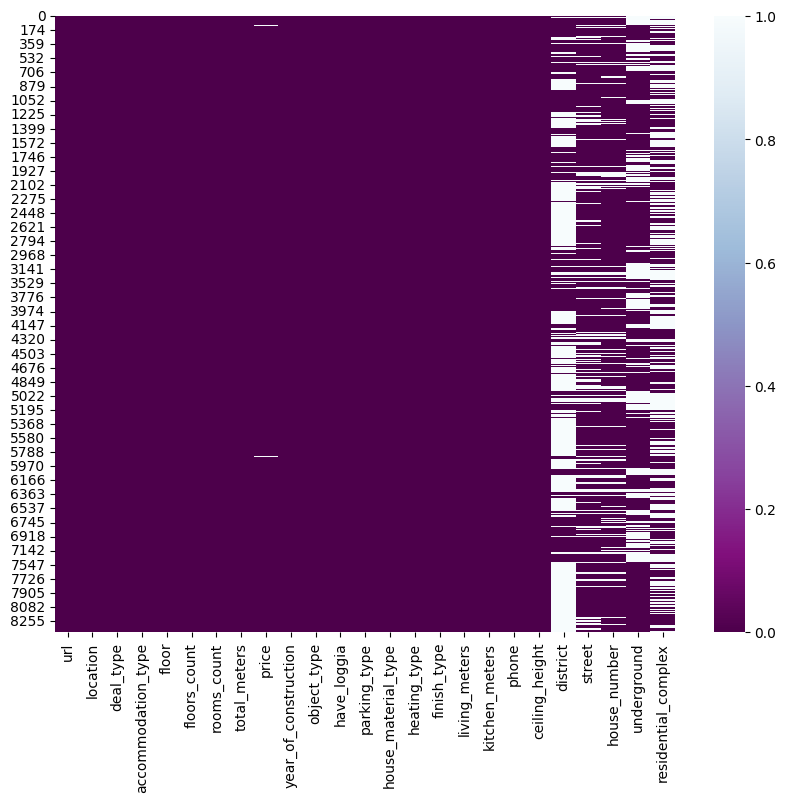

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_c.isnull(), cmap='BuPu_r')

In [ ]:
# "-1" меняем на NaN (нул. знач.)
df_c.replace('-1', np.nan, inplace=True)

df_c.head(10)

,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,2350000,1917,...,NaN,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,4150000,1975,...,NaN,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,1700000,NaN,...,NaN,NaN,NaN,79807126116,NaN,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,2500000,1968,...,NaN,NaN,NaN,79645652380,NaN,Серпухов,Российская,40,NaN,NaN
4,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,3000000,2009,...,NaN,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,6599999,NaN,...,NaN,25 м²,6 м²,79647820594,NaN,Серпухов,2-я Московская,6к3,NaN,NaN
6,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,3350000,1917,...,NaN,25 м²,NaN,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,3600000,1917,...,NaN,NaN,NaN,79647821411,NaN,Серпухов,Крюкова,4,NaN,NaN
8,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,1900000,1969,...,NaN,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,3990000,1980,...,NaN,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


In [ ]:
# выводим кол-во нул. значений ещё раз
null_counts_cian = df_c.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

                  Column  Null Count
0                    url           1
1               location           1
2              deal_type           1
3     accommodation_type           1
4                  floor           1
5           floors_count           1
6            rooms_count          97
7           total_meters           1
8                  price          14
9   year_of_construction        1315
10           object_type           1
11           have_loggia        3243
12          parking_type        3334
13   house_material_type        6191
14          heating_type        7576
15           finish_type        5668
16         living_meters        1701
17        kitchen_meters        1277
18                 phone           1
19        ceiling_height        2664
20              district        4583
21                street        1575
22          house_number        1133
23           underground        2277
24   residential_complex        3778


<Axes: >

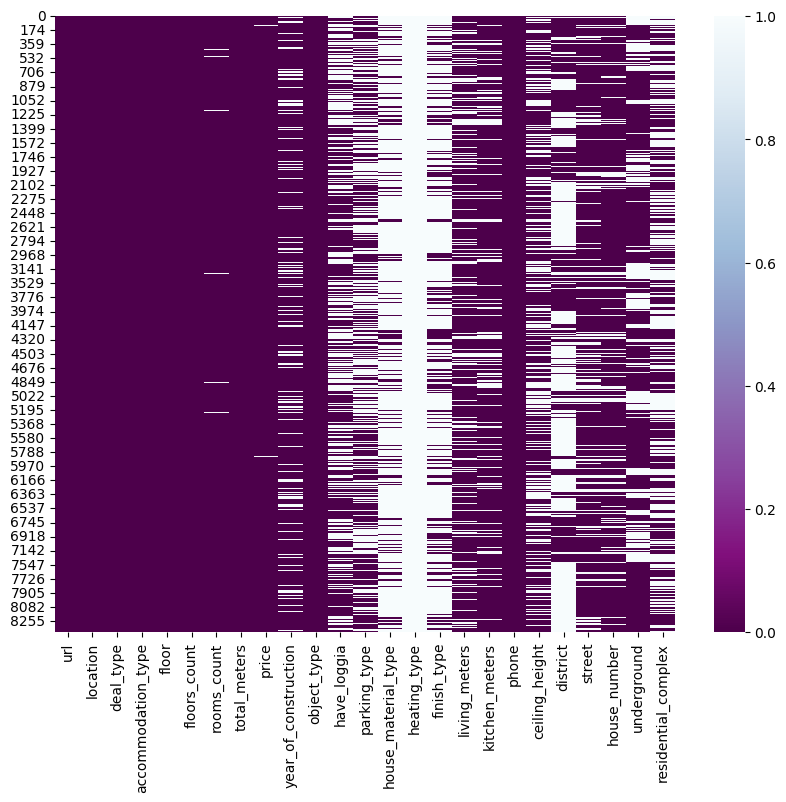

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_c.isnull(), cmap='BuPu_r')

Пропусков стало намного больше. Полностью удаляем колонки "heating_type", "house_material_type", "finish_type" и 'district', т.к. в них очень много пропусков. Так же удаляем строчки, в которых не указаны атрибуты "rooms_count" и "url".
Ещё удаляем колонки "house_number" и "residential_complex", из адреса (местоположения) оставляем метро\мцд и улицу.

Удаляем колонку с номером телефона, т.к. она не нужна для анализа

In [ ]:
# дроп колонок
df_c.drop(['heating_type', 'house_material_type', 'house_number', 'residential_complex', 'phone', 'district', 'finish_type'], axis=1,inplace=True)
# дроп строчек
df_c = df_c.dropna(subset=['url', 'rooms_count'])

Попробуем вывести информацию о том, какие значения есть в колонке "url"

In [ ]:
df_c[['url']].describe()

,url
count,7480
unique,6636
top,https://www.cian.ru/sale/flat/308553708/
freq,6


Уникальных значений в колонке "url" меньше, чем строк (самих ссылок). Оставляем только уникальные значения

In [ ]:
df_c = df_c.drop_duplicates(subset=['url'], keep='first')
print(df_c.shape)

(6636, 18)


Заменим пропуски в колонках "have_loggia", "parking_type" на "0", то есть укажем, что парковки/балконов просто нет

In [ ]:
df_c['have_loggia'] = df_c['have_loggia'].fillna('0')
df_c['parking_type'] = df_c['parking_type'].fillna('0')



---


Визуализация пропусков

<Axes: >

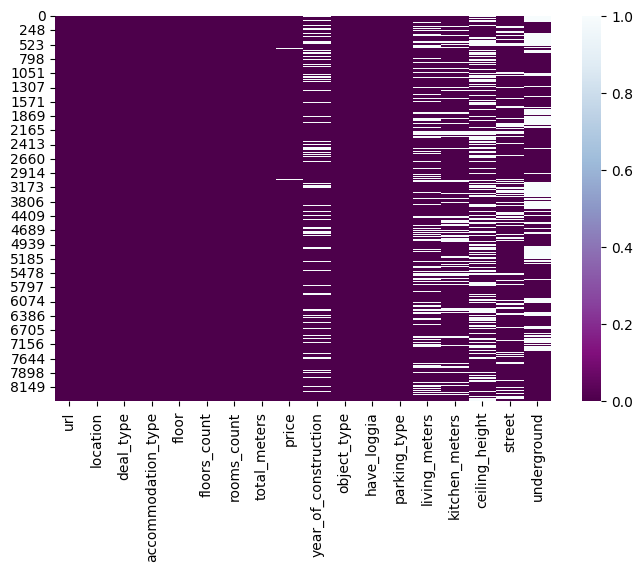

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_c.isnull(), cmap='BuPu_r')

In [ ]:
# выводим кол-во пропусков
null_counts_cian = df_c.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

                  Column  Null Count
0                    url           0
1               location           0
2              deal_type           0
3     accommodation_type           0
4                  floor           0
5           floors_count           0
6            rooms_count           0
7           total_meters           0
8                  price          11
9   year_of_construction        1120
10           object_type           0
11           have_loggia           0
12          parking_type           0
13         living_meters        1466
14        kitchen_meters        1088
15        ceiling_height        2315
16                street        1396
17           underground        1988


Заполняем пропуски в колонке "price": Выводим ссылки и вручную меняем значение в ячейке на стоимость

In [ ]:
# берём из дф строчки, где по колонке price нул. значения, сохраняем их
#в новую переменную (тип: дф) и выводим только url
nul_price = df_c[df_c['price'].isnull() == True]
nul_price['url']

,url
115,https://www.cian.ru/sale/flat/306610279/
499,https://odintsovo.cian.ru/sale/flat/308938596/
579,https://www.cian.ru/sale/flat/306610643/
598,https://spb.cian.ru/sale/flat/301311394/
927,https://www.cian.ru/sale/flat/306611541/
1040,https://www.cian.ru/sale/flat/308752150/
1103,https://www.cian.ru/sale/flat/272333560/
3027,https://www.cian.ru/sale/flat/308960138/
3053,https://www.cian.ru/sale/flat/306611693/
3498,https://odintsovo.cian.ru/sale/flat/308938542/


In [ ]:
df_nul_price = df_c.loc[df_c['price'].isna()]
df_nul_price

,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
115,https://www.cian.ru/sale/flat/306610279/,Москва,sale,flat,8,59,3,56.1,NaN,2028,Новостройка,0,0,"36,1 м²",NaN,"2,85 м",NaN,Давыдково
499,https://odintsovo.cian.ru/sale/flat/308938596/,Одинцово,sale,flat,2,24,1,36.3,NaN,2025,Новостройка,0,Подземная,"21,8 м²",NaN,"2,8 м",NaN,Одинцово
579,https://www.cian.ru/sale/flat/306610643/,Ивантеевка,sale,flat,2,59,2,31.1,NaN,2028,Новостройка,0,0,"15,7 м²",NaN,"2,85 м",NaN,Давыдково
598,https://spb.cian.ru/sale/flat/301311394/,Ивантеевка,sale,flat,9,12,3,115.1,NaN,2023,Новостройка,0,0,"48,4 м²",28 м²,"2,85 м",Белоостровская,Лесная
927,https://www.cian.ru/sale/flat/306611541/,Москва,sale,flat,2,59,1,30.4,NaN,2028,Новостройка,0,0,"9,7 м²",NaN,"2,85 м",NaN,Давыдково
1040,https://www.cian.ru/sale/flat/308752150/,Москва,sale,flat,14,21,1,38.93,NaN,2026,Новостройка,0,Подземная,NaN,NaN,"2,85 м",Северный ао,Селигерская
1103,https://www.cian.ru/sale/flat/272333560/,Москва,sale,flat,11,21,3,74.5,NaN,2020,Новостройка / Апартаменты,0,0,"46,9 м²","7,8 м²","3,3 м",Аминьевское шоссе,Давыдково
3027,https://www.cian.ru/sale/flat/308960138/,Москва,sale,flat,16,47,4,80.3,NaN,2027,Новостройка,0,Подземная,"33,6 м²","27,6 м²","2,68 м",NaN,Кожуховская
3053,https://www.cian.ru/sale/flat/306611693/,Москва,sale,flat,2,59,4,94.9,NaN,2028,Новостройка,0,0,"54,6 м²",NaN,"2,85 м",NaN,Давыдково
3498,https://odintsovo.cian.ru/sale/flat/308938542/,Одинцово,sale,flat,2,24,4,82.78,NaN,2025,Новостройка,0,Подземная,"49,7 м²",NaN,"2,8 м",NaN,Одинцово


In [ ]:
# удаляем 598-ую строчку тк там СПБ
df_c.drop(598, inplace=True)
# остальные строчки заполняем
df_c.loc[115, 'price'] = '24276097'
df_c.loc[499, 'price'] = '8348901'
df_c.loc[579, 'price'] = '15456451'
df_c.loc[927, 'price'] = '14475264'
df_c.loc[1040, 'price'] = '15734509'
df_c.loc[1103, 'price'] = '22984089'
df_c.loc[3027, 'price'] = '39335873'
df_c.loc[3053, 'price'] = '34958598'
df_c.loc[3498, 'price'] = '17531381'
df_c.loc[5842, 'price'] = '36727923'

<Axes: >

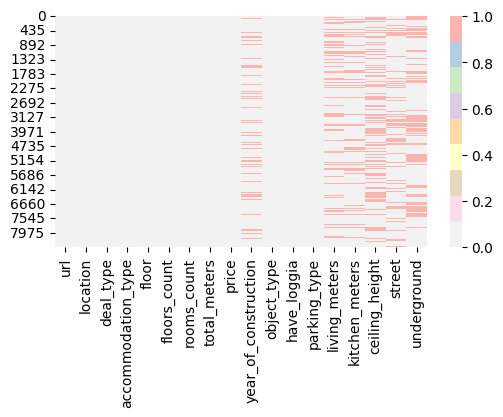

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_c.isnull(), cmap='Pastel1_r')

In [ ]:
# удаляем колонку с адресом, она больше не нужна
df_c.drop(['url'], axis=1,inplace=True)

Смотрим на значения колонок "deal_type" и "accommodation_type"

In [ ]:
print(df_c['deal_type'].unique())
print(df_c['accommodation_type'].unique())

['sale' 'deal_type']
['flat' 'accommodation_type']


In [ ]:
# удаляем их, тк они содержат одно значение и ни на что не влияют
# p.s. в дф есть строчка, в которой во всех колонках дублируются
#названия колонок, она потом удалится
df_c.drop(['deal_type', 'accommodation_type'], axis=1,inplace=True)

## Кодирование + обработка нул. значений(?)

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6635 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              6635 non-null   object
 1   floor                 6635 non-null   object
 2   floors_count          6635 non-null   object
 3   rooms_count           6635 non-null   object
 4   total_meters          6635 non-null   object
 5   price                 6635 non-null   object
 6   year_of_construction  5515 non-null   object
 7   object_type           6635 non-null   object
 8   have_loggia           6635 non-null   object
 9   parking_type          6635 non-null   object
 10  living_meters         5169 non-null   object
 11  kitchen_meters        5547 non-null   object
 12  ceiling_height        4320 non-null   object
 13  street                5239 non-null   object
 14  underground           4647 non-null   object
dtypes: object(15)
memory usage: 1.1+ MB




---


Меняем тип данных у колонок, которые хранят численные данные



---

* rooms_count




In [ ]:
# выводим уник. значения
df_c['rooms_count'].unique()

array(['1', '2', '3', '4', '5', 'rooms_count'], dtype=object)

In [ ]:
# rooms_count странное значение, выводим все строчки с ним
df_st_rooms = df_c.loc[df_c['rooms_count'] == 'rooms_count']
df_st_rooms

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
4346,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground


In [ ]:
# удаляем эту строчку
df_c.drop(4346, inplace=True)

In [ ]:
# меняем тип данных
df_c['rooms_count'] = pd.to_numeric(df_c['rooms_count'], errors='raise')
df_c['rooms_count']

,rooms_count
0,1
1,1
2,1
3,1
4,1
...,...
8388,2
8389,2
8390,2
8391,2




---



*   Price



In [ ]:
df_c['price'] = pd.to_numeric(df_c['price'], errors='raise')
# изменяем флот на инт
df_c['price'] = df_c['price'].astype(int)
df_c['price']

,price
0,2350000
1,4150000
2,1700000
3,2500000
4,3000000
...,...
8388,11400000
8389,8607014
8390,7300000
8391,6400000




---



*   floor и floors_count



In [ ]:
# floor
df_c['floor'] = pd.to_numeric(df_c['floor'], errors ='raise')
df_c['floor']

,floor
0,6
1,1
2,4
3,5
4,4
...,...
8388,8
8389,19
8390,3
8391,3


In [ ]:
# floors_count
df_c['floors_count'] = pd.to_numeric(df_c['floors_count'], errors ='raise')
df_c['floors_count']

,floors_count
0,6
1,9
2,4
3,5
4,7
...,...
8388,14
8389,25
8390,5
8391,6




---





* total_meters




In [ ]:
df_c['total_meters'].unique()

array(['20.7', '33.0', '14.0', ..., '30.47', '36.79', '48.39'],
      dtype=object)

In [ ]:
df_c['total_meters'] = pd.to_numeric(df_c['total_meters'], errors ='raise')
df_c['total_meters']

,total_meters
0,20.7
1,33.0
2,14.0
3,17.5
4,25.9
...,...
8388,69.7
8389,48.1
8390,45.0
8391,34.0




---

Снова выводим информацию про дф

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6634 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6634 non-null   object 
 1   floor                 6634 non-null   int64  
 2   floors_count          6634 non-null   int64  
 3   rooms_count           6634 non-null   int64  
 4   total_meters          6634 non-null   float64
 5   price                 6634 non-null   int64  
 6   year_of_construction  5514 non-null   object 
 7   object_type           6634 non-null   object 
 8   have_loggia           6634 non-null   object 
 9   parking_type          6634 non-null   object 
 10  living_meters         5168 non-null   object 
 11  kitchen_meters        5546 non-null   object 
 12  ceiling_height        4319 non-null   object 
 13  street                5238 non-null   object 
 14  underground           4646 non-null   object 
dtypes: float64(1), int64(4), o



---
* ceiling_height


In [ ]:
df_c['ceiling_height'].unique()

array(['3\xa0м', '2,7\xa0м', nan, '3,5\xa0м', '2,5\xa0м', '2,8\xa0м',
       '2,4\xa0м', '2,6\xa0м', '2,65\xa0м', '2,73\xa0м', '4,6\xa0м',
       '3,25\xa0м', '2,85\xa0м', '3,2\xa0м', '2,64\xa0м', '3,6\xa0м',
       '3,06\xa0м', '3,1\xa0м', '3,15\xa0м', '3,35\xa0м', '2,92\xa0м',
       '3,12\xa0м', '5\xa0м', '3,3\xa0м', '2,87\xa0м', '2,95\xa0м',
       '2,9\xa0м', '2,82\xa0м', '2,99\xa0м', '3,08\xa0м', '3,4\xa0м',
       '3,27\xa0м', '2,75\xa0м', '3,9\xa0м', '6\xa0м', '3,43\xa0м',
       '2,51\xa0м', '3,05\xa0м', '2,78\xa0м', '5,2\xa0м', '2,72\xa0м',
       '2,63\xa0м', '2,62\xa0м', '2,89\xa0м', '2,68\xa0м', '2,66\xa0м',
       '3,09\xa0м', '2,55\xa0м', '2,84\xa0м', '2,48\xa0м', '4\xa0м',
       '2,67\xa0м', '2,74\xa0м', '3,59\xa0м', '3,04\xa0м', '2,56\xa0м',
       '2\xa0м', '2,42\xa0м', '3,02\xa0м', '3,26\xa0м', '4,5\xa0м',
       '5,7\xa0м', '3,23\xa0м', '3,14\xa0м', '3,65\xa0м', '3,03\xa0м',
       '3,24\xa0м', '2,77\xa0м', '4,2\xa0м', '3,55\xa0м', '2,57\xa0м',
       '3,31\xa0м', 

In [ ]:
df_c['ceiling_height'] = df_c['ceiling_height'].str.replace(r'\xa0м', '', regex=True).str.replace(',', '.')
df_c['ceiling_height'] = df_c['ceiling_height'].astype(float)
df_c['ceiling_height']

,ceiling_height
0,3.00
1,2.70
2,NaN
3,NaN
4,3.50
...,...
8388,NaN
8389,2.62
8390,NaN
8391,2.75




---

Снова пропуски:

<Axes: >

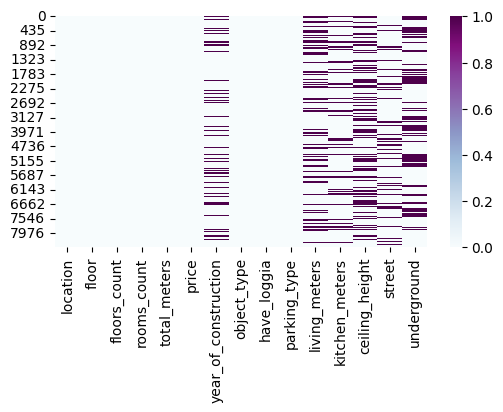

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_c.isnull(), cmap='BuPu')

Пробуем заполнить пропуски в колонке "ceiling_height"

In [ ]:
# распределение значений (?)
df_c['ceiling_height'].describe()

,ceiling_height
count,4319.000000
mean,2.830968
std,0.875777
min,0.000000
25%,2.700000
50%,2.750000
75%,2.900000
max,52.000000


Максимальное значение слишком большое для высоты потолка, минимальное тоже невозможно

<Axes: xlabel='price', ylabel='ceiling_height'>

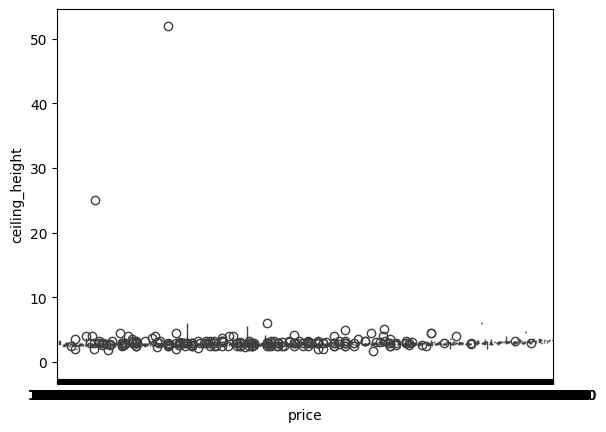

In [ ]:
sns.boxplot(x='price', y='ceiling_height', data=df_c)

Два выброса, один 52 метра в высоту, второй между 20 и 30

In [ ]:
# выводим два макс. значения
df_c.loc[df_c['ceiling_height'].nlargest(2).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
2250,Балашиха,1,2,2,58.3,5700000,1955,Вторичка,0,0,40 м²,6 м²,52.0,Маршала Говорова,Железнодорожная
5121,Клин,5,5,1,31.9,3850000,1995,Вторичка,1 балкон,Наземная,"17,7 м²","5,3 м²",25.0,Лесная,NaN


Смотрим на колонку "ceiling_height". Значения совпадают с тем, что изображено на боксплоте.
Удаляем эти строки

In [ ]:
# выводим 4 минимальных значения. Первые два дропаем, остальные оставляем
df_c.loc[df_c['ceiling_height'].nsmallest(4).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
3955,Котельники,2,5,2,47.59,12611350,2027,Новостройка,0,0,"22,2 м²","12,7 м²",0.00,Комсомольская,NaN
2649,Балашиха,13,15,3,73.60,11300000,1999,Вторичка,3 лоджии,Наземная,"40,7 м²","8,4 м²",1.65,Октябрьская,Железнодорожная
1244,Балашиха,2,5,1,30.70,4300000,1961,Вторичка,0,0,"18,6 м²","5,3 м²",1.80,Парковая,Салтыковская
731,Москва,3,12,2,37.00,9500000,NaN,Вторичка,1 балкон,Открытая,26 м²,6 м²,2.00,Коровинское шоссе,Селигерская


In [ ]:
df_c.drop(2250, inplace=True)
df_c.drop(5121, inplace=True)
df_c.drop(3955, inplace=True)
df_c.drop(2649, inplace=True)

In [ ]:
df_c['ceiling_height'].describe()

,ceiling_height
count,4315.000000
mean,2.815365
std,0.301565
min,1.800000
25%,2.700000
50%,2.750000
75%,2.900000
max,9.000000


Заполняем пропуски по колонке средним значением (mean) и округляем до сотых

In [ ]:
df_c['ceiling_height'] = df_c['ceiling_height'].fillna(df_c['ceiling_height'].mean()).round(2)
df_c

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,0,Наземная,18 м²,1 м²,3.00,Крюкова,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,0,0,18 м²,6 м²,2.70,Ворошилова,Аннино
2,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,0,0,NaN,NaN,2.82,Красный Текстильщик,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,0,0,NaN,NaN,2.82,Российская,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,0,Наземная,20 м²,5 м²,3.50,Химиков,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000,2018,Вторичка,0,0,38 м²,"10,5 м²",2.82,Юбилейная,Медведково
8389,Мытищи,19,25,2,48.1,8607014,2025,Новостройка,0,Открытая,"22,7 м²","16,1 м²",2.62,NaN,Ростокино
8390,Мытищи,3,5,2,45.0,7300000,1968,Вторичка,1 балкон,0,NaN,6 м²,2.82,Юбилейная,Медведково
8391,Мытищи,3,6,2,34.0,6400000,2023,Вторичка,1 балкон,Открытая,19 м²,8 м²,2.75,бульвар Тенистый,Медведково


Смотрим на пропуски

<Axes: >

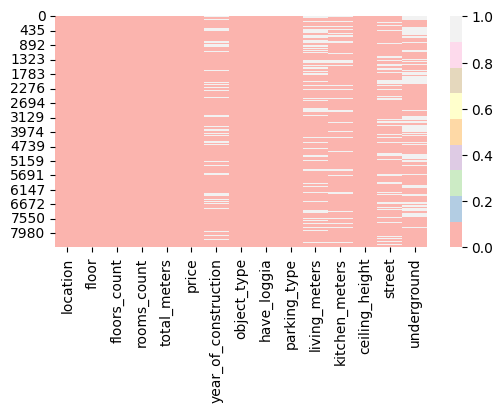

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_c.isnull(), cmap='Pastel1')



---

* object_type

In [ ]:
print(f'Уникальные значения: {df_c["object_type"].unique()}')

Уникальные значения: ['Вторичка' 'Новостройка' 'Вторичка / Апартаменты'
 'Новостройка / Апартаменты' 'Вторичка / Пентхаус'
 'Новостройка / Пентхаус']


Делаем так, чтобы было всего два варианта: новостройка и вторичка

In [ ]:
# функция для замены значений
def values(value):
  if value == 'Вторичка / Апартаменты':
    return 'Вторичка'
  elif value == 'Вторичка / Пентхаус':
    return 'Вторичка'
  elif value == 'Новостройка / Пентхаус':
    return 'Новостройка'
  elif value == 'Новостройка / Апартаменты':
    return 'Новостройка'
  else:
    return value

df_c['object_type'] = df_c['object_type'].apply(values)

print(f'Уникальные значения: {df_c["object_type"].unique()}')

Уникальные значения: ['Вторичка' 'Новостройка']


In [ ]:
df_c['object_type'] = df_c['object_type'].map(dict(Вторичка = 1, Новостройка = 0))
df_c['object_type']

,object_type
0,1
1,1
2,1
3,1
4,1
...,...
8388,1
8389,0
8390,1
8391,1




---



*   year_of_construction



In [ ]:
# выводим уник. знач.
df_c['year_of_construction'].unique()

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '2025', '2015', '1970', '1984', '1965', '2010', '1964', 'Аукцион',
       '1992', '2011', '1986', '1994', '1956', '1966', '1973', '1971',
       '1957', '2013', '1981', '1972', '1959', '2004', '1962', '2019',
       '1978', '1977', '2003', '1963', '1952', '2024', '2007', '1995',
       '1976', '1982', '1953', '2008', '2026', '2023', '1941', '2028',
       '1993', '2016', '2027', '2017', '2022', '1932', '2012', '1960',
       '2006', '1926', '2020', '1943', '2014', '2021', '1967', '1904',
       '1991', '2018', '1987', '1988', '1974', 'Напишите автору', '1979',
       '1989', '1985', '1930', '2005', '1958', '1996', '1940', '1948',
       '1961', '1938', '1997', '2002', '2001', '1999', '1983', '1998',
       '1902', '2000', '1915', '1910', '1939', '1929', '1954', '1897',
       '1900', 'Позвоните автору', '1955', '1949', '1947', '1901', '1909',
       '1600', '1951', '1936', '1931', '1950', '1934', '1928', '1945',

Дропаем строки с некорректными данными

In [ ]:
values_to_filter = ['Аукцион', 'Напишите автору', 'Позвоните автору']
maska = df_c['year_of_construction'].isin(values_to_filter)

df_c = df_c[~maska]

df_c['year_of_construction'].unique()

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '2025', '2015', '1970', '1984', '1965', '2010', '1964', '1992',
       '2011', '1986', '1994', '1956', '1966', '1973', '1971', '1957',
       '2013', '1981', '1972', '1959', '2004', '1962', '2019', '1978',
       '1977', '2003', '1963', '1952', '2024', '2007', '1995', '1976',
       '1982', '1953', '2008', '2026', '2023', '1941', '2028', '1993',
       '2016', '2027', '2017', '2022', '1932', '2012', '1960', '2006',
       '1926', '2020', '1943', '2014', '2021', '1967', '1904', '1991',
       '2018', '1987', '1988', '1974', '1979', '1989', '1985', '1930',
       '2005', '1958', '1996', '1940', '1948', '1961', '1938', '1997',
       '2002', '2001', '1999', '1983', '1998', '1902', '2000', '1915',
       '1910', '1939', '1929', '1954', '1897', '1900', '1955', '1949',
       '1947', '1901', '1909', '1600', '1951', '1936', '1931', '1950',
       '1934', '1928', '1945', '1937', '1927', '1896', '1777', '2031',
       '1

In [ ]:
print(f'Пропусков в столбце "year_of_construction": {df_c["year_of_construction"].isna().sum()}')
print(f'Процент пропущенных значений: {(df_c["year_of_construction"].isna().sum() / len(df_c["year_of_construction"])).round(2) * 100}')

Пропусков в столбце "year_of_construction": 1120
Процент пропущенных значений: 17.0


In [ ]:
df_c['year_of_construction'].describe()

,year_of_construction
count,5466
unique,112
top,2025
freq,589


Больше всего квартир с годом постройки\сдачи 2025

Кодируем колонку с годом

In [ ]:
df_c['year_of_construction'] = pd.to_numeric(df_c['year_of_construction'], errors ='raise')
df_c['year_of_construction']

<ipython-input-102-96ad8a80ec9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['year_of_construction'] = pd.to_numeric(df_c['year_of_construction'], errors ='raise')


,year_of_construction
0,1917.0
1,1975.0
2,NaN
3,1968.0
4,2009.0
...,...
8388,2018.0
8389,2025.0
8390,1968.0
8391,2023.0




---


Смотрим типы данных в колонках

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6586 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6586 non-null   object 
 1   floor                 6586 non-null   int64  
 2   floors_count          6586 non-null   int64  
 3   rooms_count           6586 non-null   int64  
 4   total_meters          6586 non-null   float64
 5   price                 6586 non-null   int64  
 6   year_of_construction  5466 non-null   float64
 7   object_type           6586 non-null   int64  
 8   have_loggia           6586 non-null   object 
 9   parking_type          6586 non-null   object 
 10  living_meters         5127 non-null   object 
 11  kitchen_meters        5499 non-null   object 
 12  ceiling_height        6586 non-null   float64
 13  street                5192 non-null   object 
 14  underground           4616 non-null   object 
dtypes: float64(3), int64(5), o



---



*   Кодируем оставшиеся колонки со значениями типа object, кроме площади кухни и жилой площади



In [ ]:
# выводим уникальные значения
print(f'''have_loggia: {df_c['have_loggia'].unique()}
{'-'*150}
street: {df_c['street'].unique()}
{'-'*150}
underground: {df_c['underground'].unique()}
{'-'*150}
parking_type: {df_c['parking_type'].unique()}
{'-'*150}
location: {df_c['location'].unique()}''')

have_loggia: ['0' '1 лоджия' '1 балкон' '3 лоджии' '2 лоджии' '1 лоджия, 1 балкон'
 '2 балкона' '3 балкона' '4 балкона' '1 лоджия, 2 балкона'
 '2 лоджии, 1 балкон' '2 лоджии, 2 балкона' '4 лоджии']
------------------------------------------------------------------------------------------------------------------------------------------------------
street: [' Крюкова' ' Ворошилова' ' Красный Текстильщик' ... ' Разведчика Абеля'
 'Силикатная ' 'Ярославское шоссе']
------------------------------------------------------------------------------------------------------------------------------------------------------
underground: [nan 'Аннино' 'Поклонная' 'Белорусская' 'Бауманская' 'Тульская' 'Фили'
 'Аэропорт' 'Улица 1905 года' 'Смоленская' 'Дмитровская' 'Давыдково'
 'Маяковская' 'ЦСКА' 'Улица Академика Янгеля' 'Лермонтовский проспект'
 'Зеленоград — Крюково' 'Говорово' 'Цветной бульвар' 'Ясенево'
 'Преображенская площадь' 'Юго-Западная' 'Новые Черёмушки' 'Гражданская'
 'Октябрьское поле' 'ЗИ

в колонке location есть такие значения как москва, Талодом и Яхромаа. Заменяем их на корректные:

In [ ]:
# функция для замены значений
def values_loc(value):
  if value == 'москва':
    return 'Москва'
  elif value == 'Талодом':
    return 'Талдом'
  elif value == 'Яхромаа':
    return 'Яхрома'
  else:
    return value

df_c['location'] = df_c['location'].apply(values_loc)

print(f'Уникальные значения: {df_c["location"].unique()}')

Уникальные значения: ['Серпухов' 'Дубна' 'Москва' 'Яхрома' 'Воскресенск' 'Талдом' 'Руза'
 'Реутов' 'Краснозаводск' 'Одинцово' 'Люберцы' 'Ивантеевка' 'Котельники'
 'Электросталь' 'Долгопрудный' 'Лобня' 'Химки' 'Хотьково' 'Балашиха'
 'Домодедово' 'Раменское' 'Бекасово' 'Звенигород' 'Дмитров' 'Ногинск'
 'Троицк' 'Щёлково' 'Королёв' 'Клин' 'Черноголовка' 'Видное' 'Волоколамск'
 'Дзержинский' 'Пересвет' 'Фрязино' 'Шатура' 'Красногорск' 'Мытищи']


<ipython-input-105-79a5f902c359>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['location'] = df_c['location'].apply(values_loc)


In [ ]:
# смотрим сколько чего у нас спарсилось по городам
location_counts_df = df_c['location'].value_counts().reset_index()
location_counts_df.columns = ['location', 'count']

print(location_counts_df)

         location  count
0        Балашиха   1147
1           Химки    778
2          Москва    688
3      Котельники    334
4         Щёлково    321
5         Королёв    287
6    Долгопрудный    259
7         Дмитров    242
8        Бекасово    239
9        Пересвет    238
10         Мытищи    191
11    Дзержинский    168
12   Электросталь    160
13           Клин    158
14    Красногорск    140
15         Яхрома    122
16     Домодедово    104
17        Люберцы     90
18    Волоколамск     83
19         Видное     78
20     Ивантеевка     78
21         Талдом     73
22     Звенигород     72
23        Фрязино     68
24      Раменское     61
25       Серпухов     57
26          Дубна     57
27          Лобня     54
28           Руза     54
29         Троицк     52
30       Хотьково     31
31   Черноголовка     23
32  Краснозаводск     23
33         Реутов     15
34    Воскресенск     14
35         Шатура     13
36        Ногинск     12
37       Одинцово      2


пс: одинцово очень очень плохо парсилось у нескольких человек с разных wifi (╥‸╥)



---

В колонке "underground" ставим 0, если есть пропуск, если нет - ставим 1

In [ ]:
def replace_values(value):
    if pd.isna(value):
        return 0
    else:
        return 1

df_c['underground'] = df_c['underground'].apply(replace_values)

<ipython-input-107-6d1df777d13f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['underground'] = df_c['underground'].apply(replace_values)


In [ ]:
# проверяем уникальные значения
df_c['underground'].unique()

array([0, 1])

In [ ]:
# кодируем
from sklearn import preprocessing

columns = ['have_loggia', 'street', 'parking_type', 'location']

for col in columns:
  le = preprocessing.LabelEncoder()
  df_c[col] = le.fit_transform(df_c[col])
  integer_mapping = {l: i for i, l in enumerate(le.classes_)}
  print(f'Новое значения по колонке {col}: {integer_mapping}')

Новое значения по колонке have_loggia: {'0': 0, '1 балкон': 1, '1 лоджия': 2, '1 лоджия, 1 балкон': 3, '1 лоджия, 2 балкона': 4, '2 балкона': 5, '2 лоджии': 6, '2 лоджии, 1 балкон': 7, '2 лоджии, 2 балкона': 8, '3 балкона': 9, '3 лоджии': 10, '4 балкона': 11, '4 лоджии': 12}
Новое значения по колонке street: {' 1 Мая': 0, ' 1-я Ватутинская': 1, ' 1-я Коммунистическая': 2, ' 1-я Лесная': 3, ' 1-я Машиностроения': 4, ' 1-я Урицкая': 5, ' 1-я Хотьковская': 6, ' 1-я Ямского Поля': 7, ' 2-я Институтская': 8, ' 2-я Комсомольская': 9, ' 2-я Московская': 10, ' 2-я Рабочая': 11, ' 2-я Центральная': 12, ' 2-я Энтузиастов': 13, ' 25 лет Октября': 14, ' 25-го съезда': 15, ' 3-го Интернационала': 16, ' 3-е Почтовое Отделение': 17, ' 3-я Крестьянская': 18, ' 3-я Митино': 19, ' 3-я Парковая': 20, ' 3-я Ямского Поля': 21, ' 4-й Пятилетки': 22, ' 4-я Марьиной рощи': 23, ' 4-я Парковая': 24, ' 4-я Советская': 25, ' 40 лет Победы': 26, ' 50 лет ВЛКСМ': 27, ' 50 лет Октября': 28, ' 50-летия ВЛКСМ': 29, ' 

<ipython-input-110-463a4eda075d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[col] = le.fit_transform(df_c[col])
<ipython-input-110-463a4eda075d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[col] = le.fit_transform(df_c[col])
<ipython-input-110-463a4eda075d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6586 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6586 non-null   int64  
 1   floor                 6586 non-null   int64  
 2   floors_count          6586 non-null   int64  
 3   rooms_count           6586 non-null   int64  
 4   total_meters          6586 non-null   float64
 5   price                 6586 non-null   int64  
 6   year_of_construction  5466 non-null   float64
 7   object_type           6586 non-null   int64  
 8   have_loggia           6586 non-null   int64  
 9   parking_type          6586 non-null   int64  
 10  living_meters         5127 non-null   object 
 11  kitchen_meters        5499 non-null   object 
 12  ceiling_height        6586 non-null   float64
 13  street                6586 non-null   int64  
 14  underground           6586 non-null   int64  
dtypes: float64(3), int64(10), 

Кодируем жилую площадь и площадь кухни

In [ ]:
# уник. знач. living_meters
df_c['living_meters'].unique()

array(['18\xa0м²', nan, '20\xa0м²', '25\xa0м²', '29,7\xa0м²',
       '24,9\xa0м²', '13,4\xa0м²', '14,1\xa0м²', '28\xa0м²', '15\xa0м²',
       '19\xa0м²', '16\xa0м²', '40\xa0м²', '45\xa0м²', '50\xa0м²',
       '44\xa0м²', '39\xa0м²', '41\xa0м²', '32,5\xa0м²', '27,4\xa0м²',
       '17\xa0м²', '33\xa0м²', '27\xa0м²', '34\xa0м²', '30\xa0м²',
       '30,7\xa0м²', '29\xa0м²', '38\xa0м²', '28,9\xa0м²', '26\xa0м²',
       '18,1\xa0м²', '13\xa0м²', '18,2\xa0м²', '9\xa0м²', '14\xa0м²',
       '11,4\xa0м²', '19,3\xa0м²', '20,7\xa0м²', '32\xa0м²', '28,6\xa0м²',
       '41,5\xa0м²', '31,2\xa0м²', '56,5\xa0м²', '48,8\xa0м²', '37\xa0м²',
       '50,5\xa0м²', '37,7\xa0м²', '39,4\xa0м²', '52\xa0м²', '52,1\xa0м²',
       '39,1\xa0м²', '35,2\xa0м²', '69\xa0м²', '35,7\xa0м²', '36,1\xa0м²',
       '23,4\xa0м²', '26,8\xa0м²', '18,8\xa0м²', '45,8\xa0м²',
       '32,8\xa0м²', '6,3\xa0м²', '10,5\xa0м²', '28,2\xa0м²',
       '13,5\xa0м²', '15,2\xa0м²', '10,3\xa0м²', '12,8\xa0м²',
       '70,9\xa0м²', '46,6\xa0м

In [ ]:
# уник. знач. kitchen_meters
df_c['kitchen_meters'].unique()

array(['1\xa0м²', '6\xa0м²', nan, '5\xa0м²', '5,6\xa0м²', '3\xa0м²',
       '6,2\xa0м²', '7\xa0м²', '7,3\xa0м²', '6,1\xa0м²', '10\xa0м²',
       '9\xa0м²', '8\xa0м²', '5,7\xa0м²', '11\xa0м²', '7,5\xa0м²',
       '13,5\xa0м²', '6,5\xa0м²', '5,8\xa0м²', '20\xa0м²', '11,2\xa0м²',
       '7,8\xa0м²', '4\xa0м²', '7,9\xa0м²', '4,1\xa0м²', '12\xa0м²',
       '7,7\xa0м²', '8,1\xa0м²', '9,3\xa0м²', '10,2\xa0м²', '10,6\xa0м²',
       '8,5\xa0м²', '9,1\xa0м²', '4,5\xa0м²', '6,7\xa0м²', '45\xa0м²',
       '34,3\xa0м²', '25,5\xa0м²', '46,2\xa0м²', '4,9\xa0м²', '8,4\xa0м²',
       '24,9\xa0м²', '15\xa0м²', '15,8\xa0м²', '11,5\xa0м²', '5,5\xa0м²',
       '10,7\xa0м²', '19,4\xa0м²', '43,8\xa0м²', '44,5\xa0м²',
       '22,4\xa0м²', '25\xa0м²', '28,4\xa0м²', '19\xa0м²', '16\xa0м²',
       '21\xa0м²', '5,1\xa0м²', '18,3\xa0м²', '3,8\xa0м²', '19,2\xa0м²',
       '16,2\xa0м²', '21,7\xa0м²', '12,5\xa0м²', '15,4\xa0м²', '28\xa0м²',
       '17\xa0м²', '10,4\xa0м²', '13,6\xa0м²', '21,8\xa0м²', '14\xa0м²',
    

In [ ]:
# living_meters
df_c['living_meters'] = df_c['living_meters'].str.replace(r'\xa0м²', '', regex=True).str.replace(',', '.')
df_c['living_meters'] = df_c['living_meters'].astype(float)
df_c['living_meters']

<ipython-input-114-15a76277d25b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['living_meters'] = df_c['living_meters'].str.replace(r'\xa0м²', '', regex=True).str.replace(',', '.')
<ipython-input-114-15a76277d25b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['living_meters'] = df_c['living_meters'].astype(float)


,living_meters
0,18.0
1,18.0
2,NaN
3,NaN
4,20.0
...,...
8388,38.0
8389,22.7
8390,NaN
8391,19.0


In [ ]:
# kitchen_meters
df_c['kitchen_meters'] = df_c['kitchen_meters'].str.replace(r'\xa0м²', '', regex=True).str.replace(',', '.')
df_c['kitchen_meters'] = df_c['kitchen_meters'].astype(float)
df_c['kitchen_meters']

<ipython-input-115-fdbc53ea5feb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['kitchen_meters'] = df_c['kitchen_meters'].str.replace(r'\xa0м²', '', regex=True).str.replace(',', '.')
<ipython-input-115-fdbc53ea5feb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['kitchen_meters'] = df_c['kitchen_meters'].astype(float)


,kitchen_meters
0,1.0
1,6.0
2,NaN
3,NaN
4,5.0
...,...
8388,10.5
8389,16.1
8390,6.0
8391,8.0




---

Выводим информацию и пропуски

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6586 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6586 non-null   int64  
 1   floor                 6586 non-null   int64  
 2   floors_count          6586 non-null   int64  
 3   rooms_count           6586 non-null   int64  
 4   total_meters          6586 non-null   float64
 5   price                 6586 non-null   int64  
 6   year_of_construction  5466 non-null   float64
 7   object_type           6586 non-null   int64  
 8   have_loggia           6586 non-null   int64  
 9   parking_type          6586 non-null   int64  
 10  living_meters         5127 non-null   float64
 11  kitchen_meters        5499 non-null   float64
 12  ceiling_height        6586 non-null   float64
 13  street                6586 non-null   int64  
 14  underground           6586 non-null   int64  
dtypes: float64(5), int64(10)
m

* Все колонки имеют числовой тип данных

<Axes: >

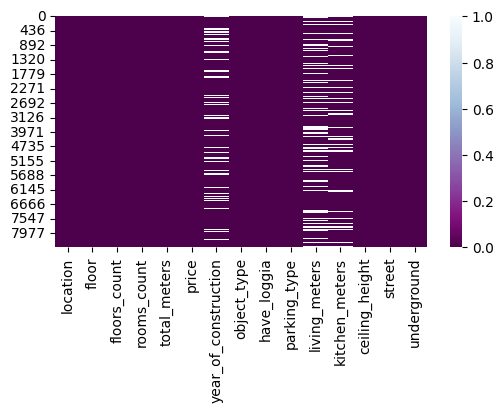

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_c.isnull(), cmap='BuPu_r')

Пропуски остались в трёх колонках, считаем их:

In [ ]:
null_counts = df_c.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Null Count']

print(null_counts)

                  Column  Null Count
0               location           0
1                  floor           0
2           floors_count           0
3            rooms_count           0
4           total_meters           0
5                  price           0
6   year_of_construction        1120
7            object_type           0
8            have_loggia           0
9           parking_type           0
10         living_meters        1459
11        kitchen_meters        1087
12        ceiling_height           0
13                street           0
14           underground           0




---

Работаем с колонкой "year_of_construction"

In [ ]:
df_c['year_of_construction'].unique()

array([1917., 1975.,   nan, 1968., 2009., 1969., 1980., 1990., 2025.,
       2015., 1970., 1984., 1965., 2010., 1964., 1992., 2011., 1986.,
       1994., 1956., 1966., 1973., 1971., 1957., 2013., 1981., 1972.,
       1959., 2004., 1962., 2019., 1978., 1977., 2003., 1963., 1952.,
       2024., 2007., 1995., 1976., 1982., 1953., 2008., 2026., 2023.,
       1941., 2028., 1993., 2016., 2027., 2017., 2022., 1932., 2012.,
       1960., 2006., 1926., 2020., 1943., 2014., 2021., 1967., 1904.,
       1991., 2018., 1987., 1988., 1974., 1979., 1989., 1985., 1930.,
       2005., 1958., 1996., 1940., 1948., 1961., 1938., 1997., 2002.,
       2001., 1999., 1983., 1998., 1902., 2000., 1915., 1910., 1939.,
       1929., 1954., 1897., 1900., 1955., 1949., 1947., 1901., 1909.,
       1600., 1951., 1936., 1931., 1950., 1934., 1928., 1945., 1937.,
       1927., 1896., 1777., 2031., 1935.])

Сразу видим странные значения, например 1600 и 1777

In [ ]:
df_c['year_of_construction'].describe()

,year_of_construction
count,5466.000000
mean,2006.121478
std,23.886784
min,1600.000000
25%,1990.000000
50%,2016.000000
75%,2024.000000
max,2031.000000


Минимальное и максимальное значения сомнительные, визуализируем это всё

<Axes: xlabel='price', ylabel='year_of_construction'>

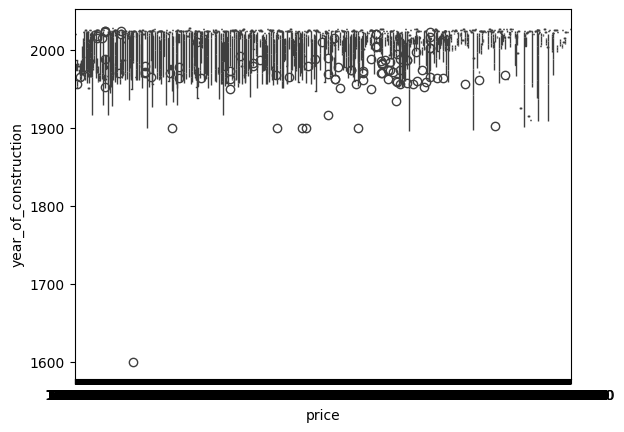

In [ ]:
sns.boxplot(x='price', y='year_of_construction', data=df_c)

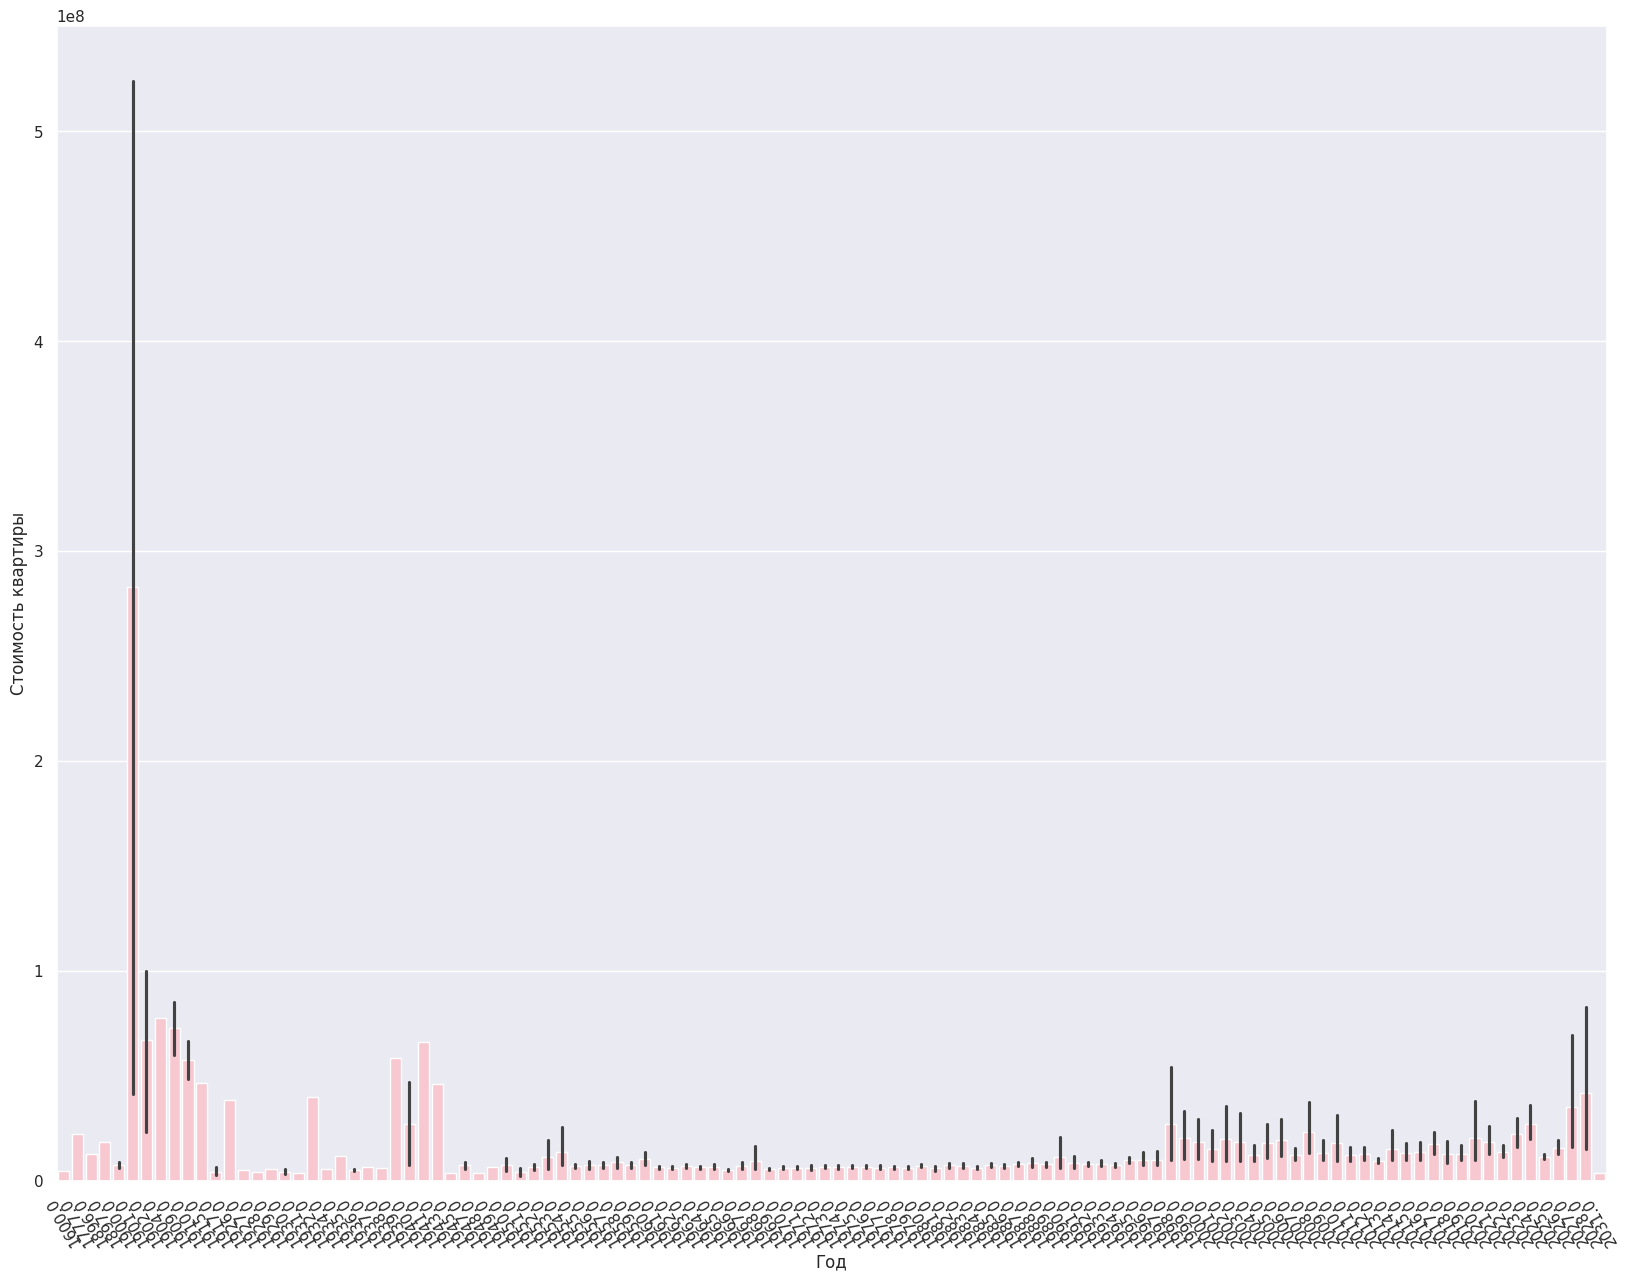

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.barplot(x='year_of_construction', y='price', data=df_c, color = 'pink')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

Всё что было до 1970-го и года убираем. То что после 2024го тоже не нужно

In [ ]:
df_c = df_c[(df_c['year_of_construction'] >= 1970) & (df_c['year_of_construction'] <= 2024)]

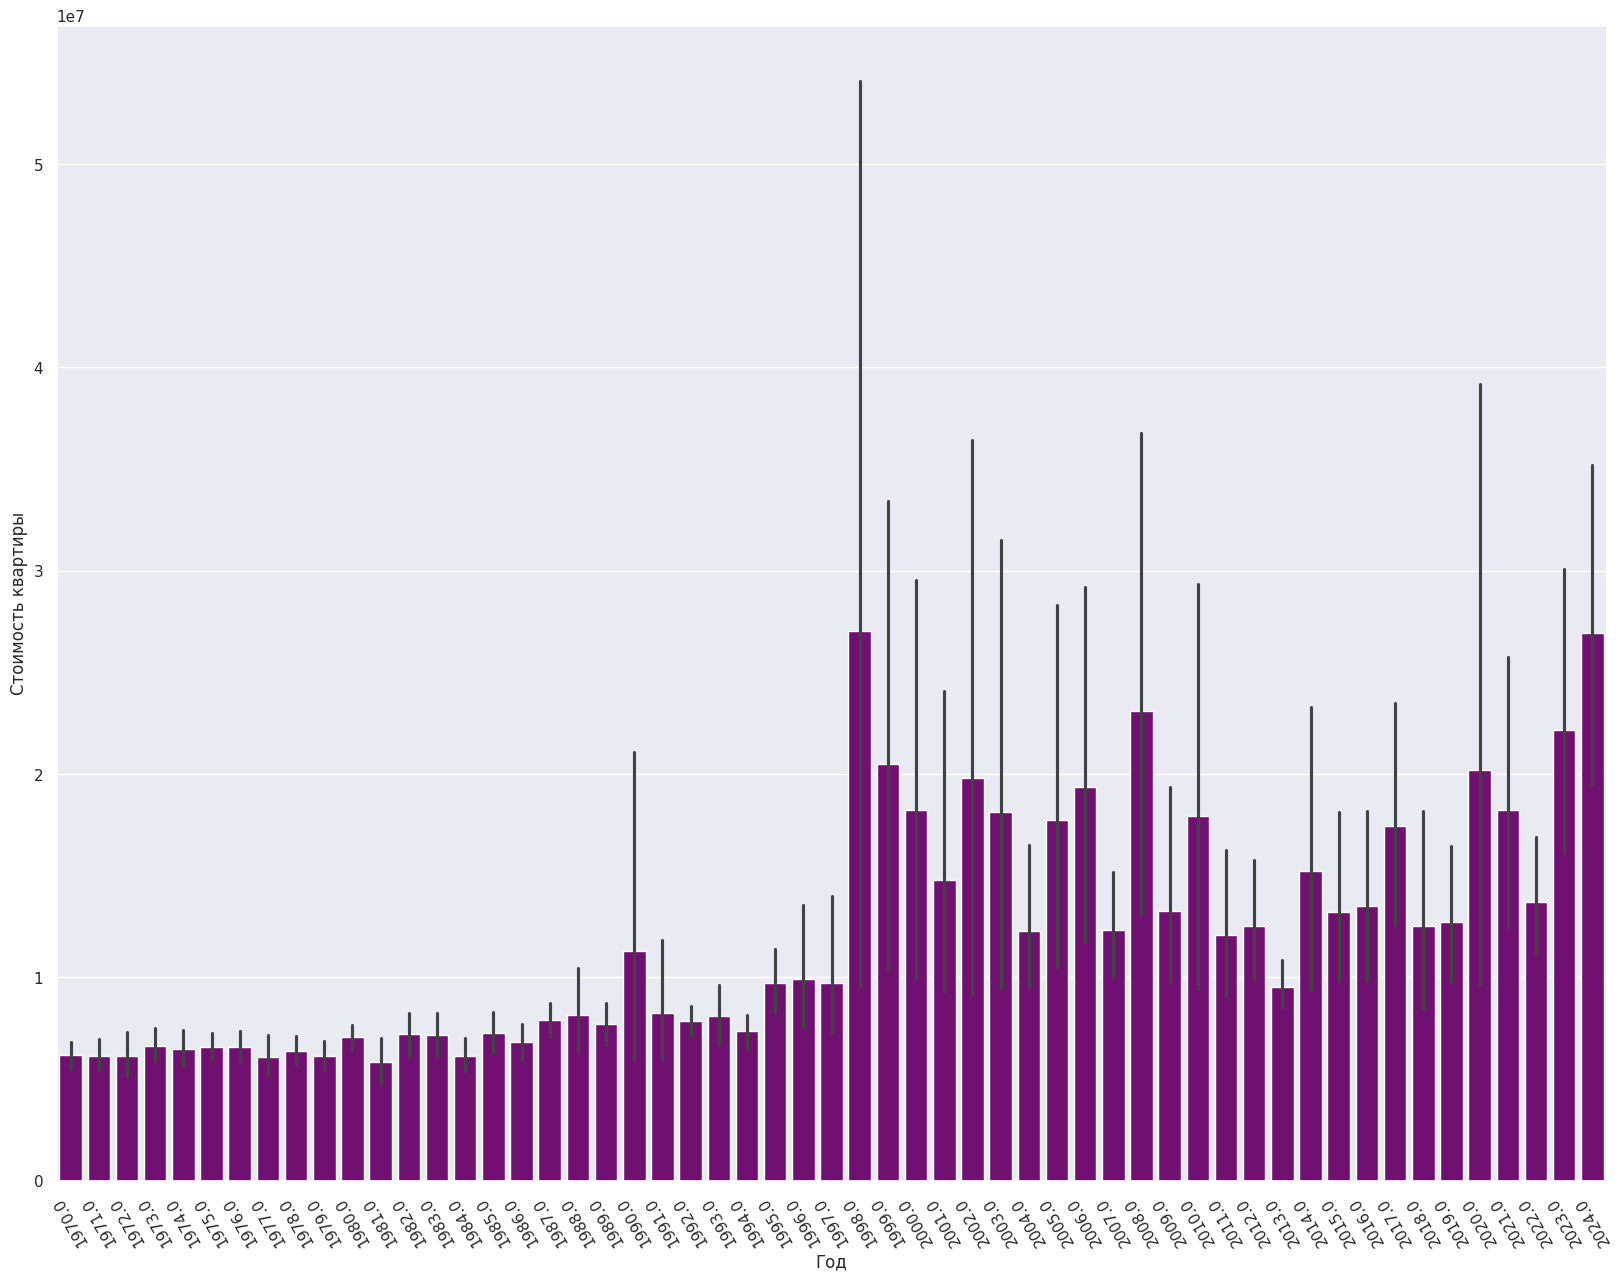

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.barplot(x='year_of_construction', y='price', data=df_c, color = 'purple')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

1998 год считаем за выброс --> удаляем

In [ ]:
df_c = df_c[df_c['year_of_construction'] != 1998]

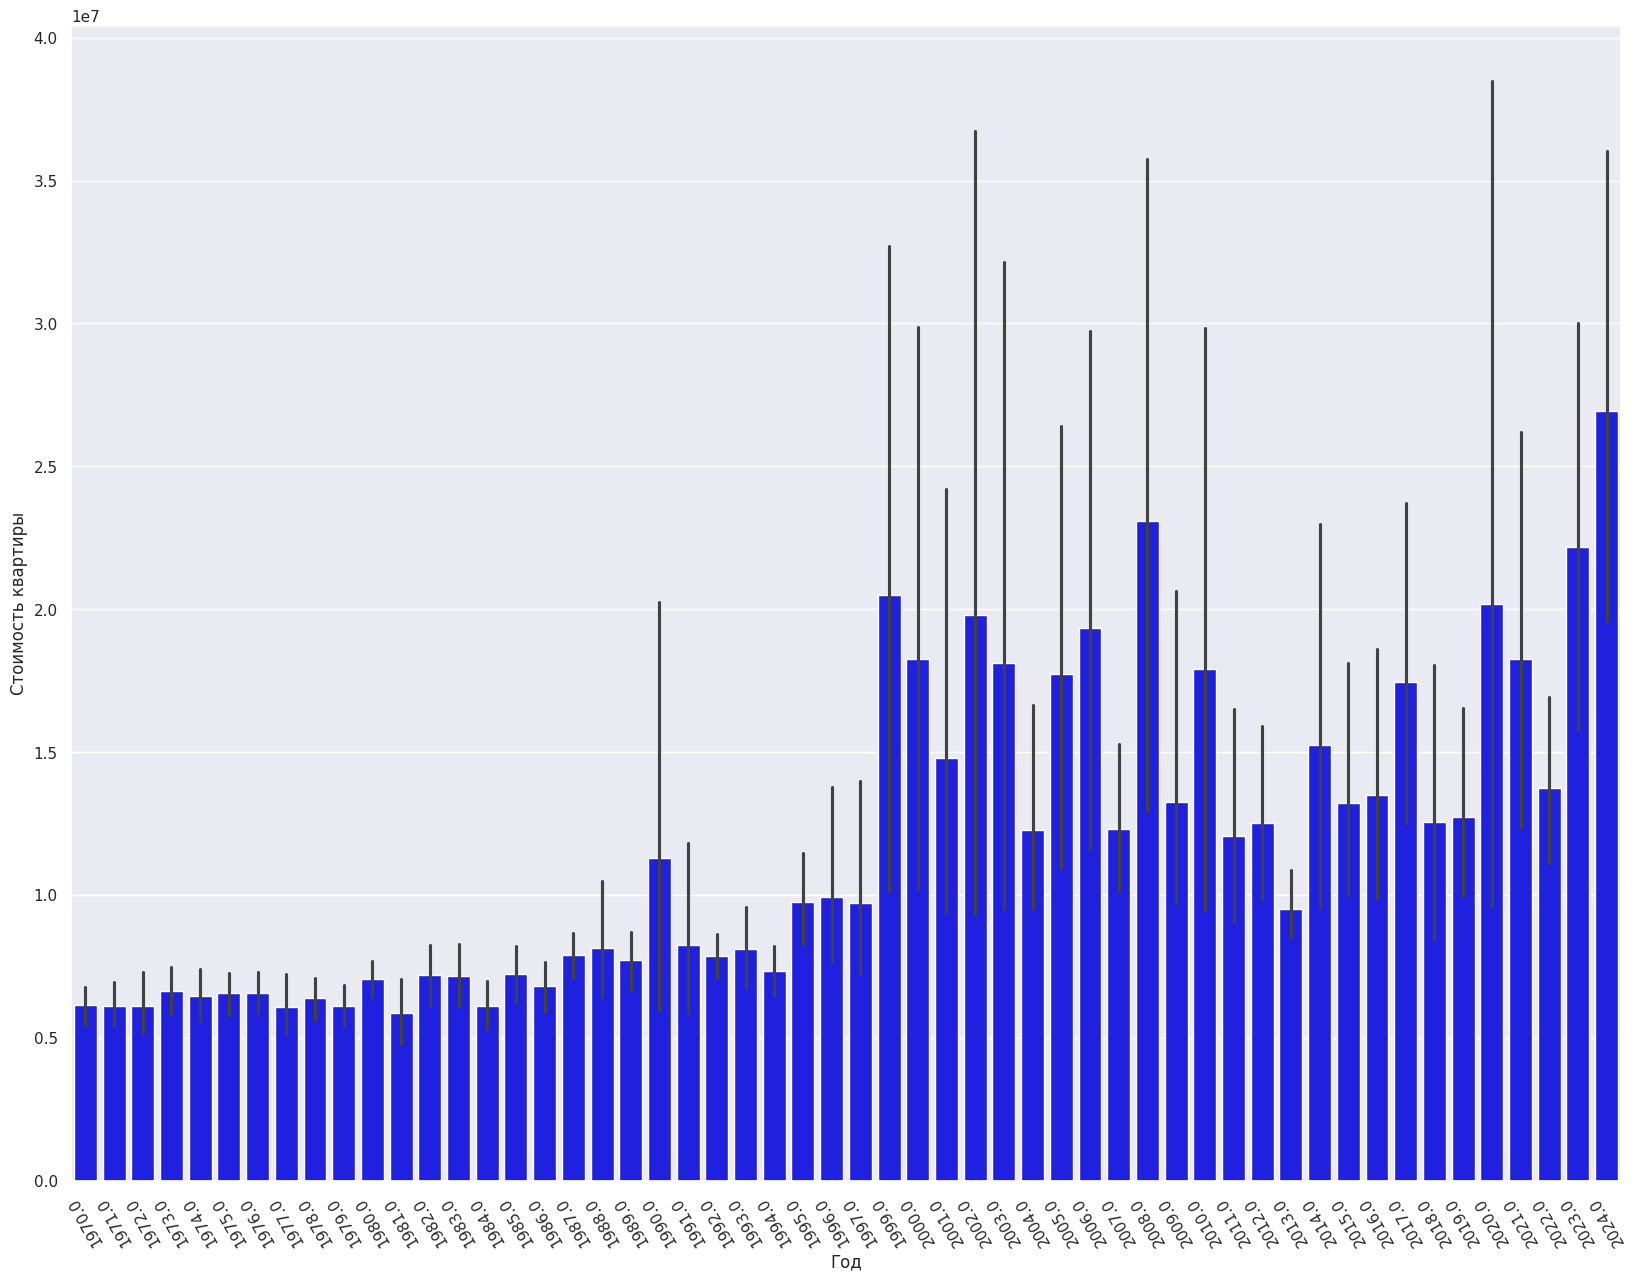

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.barplot(x = 'year_of_construction', y ='price', data=df_c, color = 'blue')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

In [ ]:
df_c['year_of_construction'].describe()

,year_of_construction
count,3716.000000
mean,2007.611141
std,16.867380
min,1970.000000
25%,1999.000000
50%,2014.000000
75%,2021.000000
max,2024.000000


Вроде как выбросы по этой колонке удалены


---



In [ ]:
# смотрим инфу (пропуски)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 1 to 8391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              3716 non-null   int64  
 1   floor                 3716 non-null   int64  
 2   floors_count          3716 non-null   int64  
 3   rooms_count           3716 non-null   int64  
 4   total_meters          3716 non-null   float64
 5   price                 3716 non-null   int64  
 6   year_of_construction  3716 non-null   float64
 7   object_type           3716 non-null   int64  
 8   have_loggia           3716 non-null   int64  
 9   parking_type          3716 non-null   int64  
 10  living_meters         2950 non-null   float64
 11  kitchen_meters        3271 non-null   float64
 12  ceiling_height        3716 non-null   float64
 13  street                3716 non-null   int64  
 14  underground           3716 non-null   int64  
dtypes: float64(5), int64(10)
m

<Axes: >

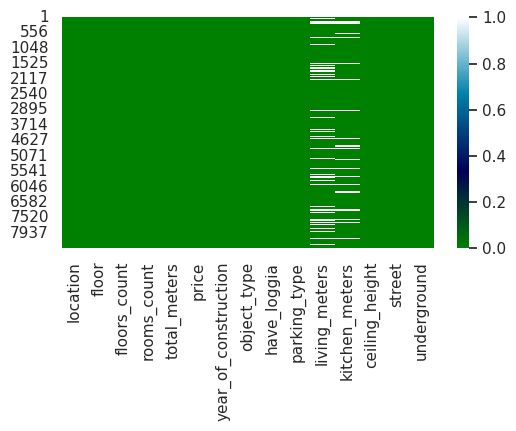

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_c.isnull(), cmap='ocean')



---


Пропуски остались в колонках "living_meters" и "kitchen_meters". Чтобы их заполнить, нужно:

1) Удалить строчки, где в обоих столбцах стоит пропуск

2) В оставшихся строках записать вместо нул. значения разницу общей площади и известной площади (жилая\кухонная). Значение будет не точным, но приближенным к реальному.

In [ ]:
# удаляем строчки где обе площади заполнены нул. значением
df_c.drop(df_c[(pd.isna(df_c['living_meters'])) & (pd.isna(df_c['kitchen_meters']))].index, inplace=True)

In [ ]:
print(f'Пропусков в столбце "living_meters": {df_c["living_meters"].isna().sum()}')
print(f'Пропусков в столбце "kitchen_meters": {df_c["kitchen_meters"].isna().sum()}')

Пропусков в столбце "living_meters": 431
Пропусков в столбце "kitchen_meters": 110


In [ ]:
# заполняем пропуски в 'living_meters'
df_c['living_meters'].fillna(df_c['total_meters'] - df_c['kitchen_meters'], inplace=True)

# заполняем пропуски в 'kitchen_meters'
df_c['kitchen_meters'].fillna(df_c['total_meters'] - df_c['living_meters'], inplace=True)

<ipython-input-132-d46e8a89959d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_c['living_meters'].fillna(df_c['total_meters'] - df_c['kitchen_meters'], inplace=True)
<ipython-input-132-d46e8a89959d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [ ]:
# пропуски
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3381 entries, 1 to 8391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              3381 non-null   int64  
 1   floor                 3381 non-null   int64  
 2   floors_count          3381 non-null   int64  
 3   rooms_count           3381 non-null   int64  
 4   total_meters          3381 non-null   float64
 5   price                 3381 non-null   int64  
 6   year_of_construction  3381 non-null   float64
 7   object_type           3381 non-null   int64  
 8   have_loggia           3381 non-null   int64  
 9   parking_type          3381 non-null   int64  
 10  living_meters         3381 non-null   float64
 11  kitchen_meters        3381 non-null   float64
 12  ceiling_height        3381 non-null   float64
 13  street                3381 non-null   int64  
 14  underground           3381 non-null   int64  
dtypes: float64(5), int64(10)
m

<Axes: >

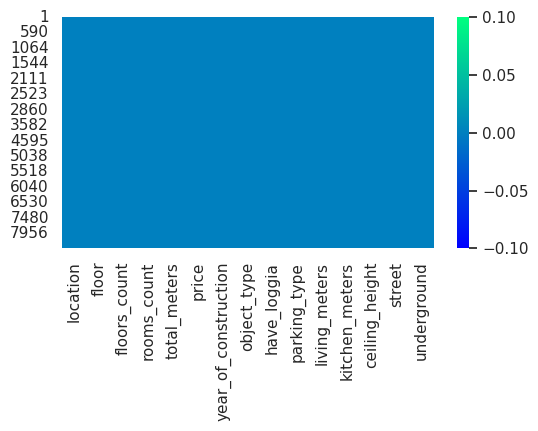

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_c.isnull(), cmap='winter')

Пропусков больше нет



---




## Работа с оставшимися выбросами

In [ ]:
# лист с колонками, в которых могут быть выбросы (атрибуты, хранящие численные по смыслу данные)
st_columns = df_c[['floor', 'total_meters', 'price', 'living_meters', 'kitchen_meters', 'floors_count']]

<function matplotlib.pyplot.show(close=None, block=None)>

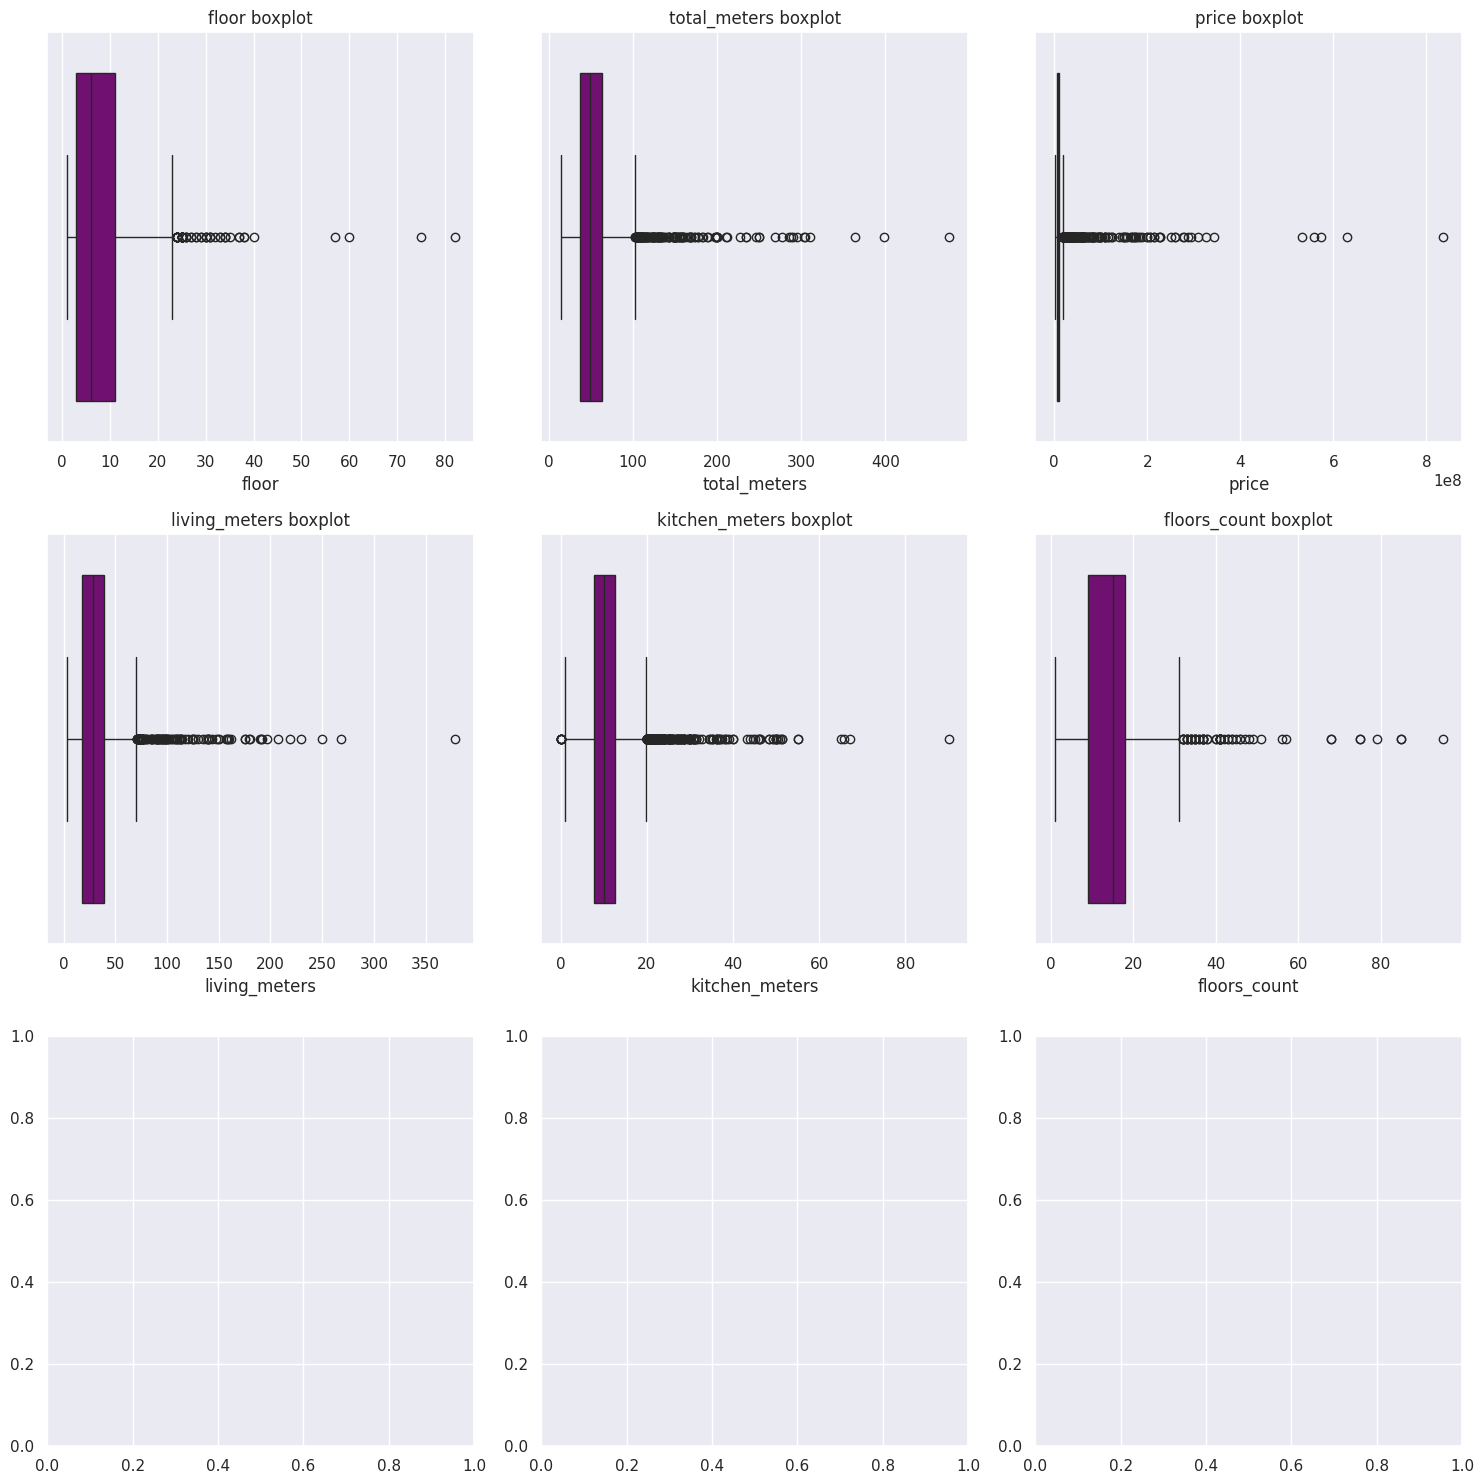

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
# создаём боксплот для каждой колонки
for i, column in enumerate(st_columns):
  row = i//3
  col = i % 3
  sns.boxplot(x=st_columns[column], ax = axes[row, col], color = 'purple')
  axes[row, col].set_title(f'{column} boxplot')

plt.subplots_adjust(hspace = 0.9)
plt.tight_layout()
plt.show



---

### floors_count

In [ ]:
df_c['floors_count'].describe()

,floors_count
count,3381.000000
mean,14.399586
std,7.878500
min,1.000000
25%,9.000000
50%,15.000000
75%,18.000000
max,95.000000


Максимальное число слишком большое для этажности жилого дома

<Axes: xlabel='floors_count'>

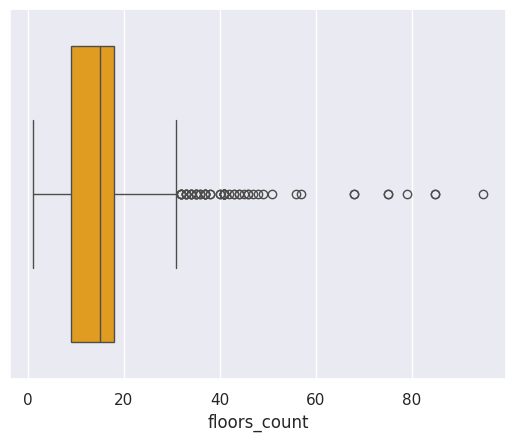

In [ ]:
# боксплот
sns.boxplot(x=df_c['floors_count'], color = 'orange')

In [ ]:
# оставляем значения, которые меньше 55-ти
df_c = df_c[df_c['floors_count'] < 55]

In [ ]:
df_c['floors_count'].describe()

,floors_count
count,3371.000000
mean,14.221893
std,7.152805
min,1.000000
25%,9.000000
50%,15.000000
75%,18.000000
max,51.000000




---

### total_meters

In [ ]:
df_c['total_meters'].describe()

,total_meters
count,3371.000000
mean,54.342952
std,29.184028
min,14.300000
25%,37.325000
50%,48.400000
75%,63.100000
max,475.000000


In [ ]:
# выводим 20 макс. значений
df_c.loc[df_c['total_meters'].nlargest(20).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
396,37,3,5,2,475.00,4799000,1977.0,1,1,2,33.0,7.0,2.82,1418,0
5867,19,1,7,5,398.10,170000000,2005.0,1,0,0,378.1,20.0,3.00,951,1
5838,19,21,21,5,363.30,629417250,2023.0,0,0,4,190.3,31.4,2.82,749,1
5849,19,6,6,5,310.15,325657500,2023.0,1,0,4,196.9,22.7,4.55,904,1
5839,19,11,12,5,303.00,531661349,2014.0,1,1,4,117.0,24.0,3.20,1178,1
5843,19,2,12,5,290.00,280000000,2006.0,1,2,0,250.0,40.0,2.82,650,1
2998,19,4,4,4,288.00,574431000,2024.0,1,5,0,268.0,20.0,3.72,603,1
2644,0,1,2,3,276.90,29999999,1991.0,1,0,0,62.0,30.7,2.95,681,1
1178,19,16,16,5,269.00,95000000,1999.0,1,8,4,219.0,50.0,3.00,916,1
1173,19,2,8,5,250.00,225000000,2010.0,1,0,4,230.0,20.0,3.00,756,1


<Axes: xlabel='total_meters'>

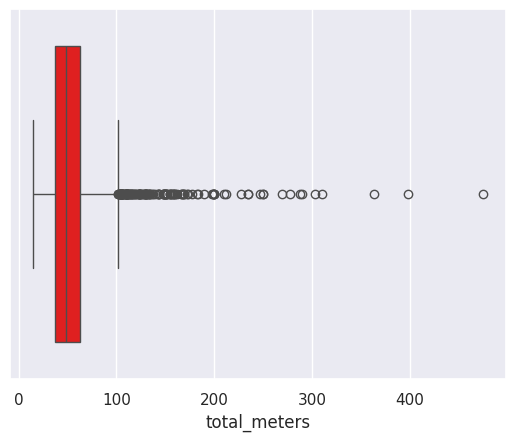

In [ ]:
sns.boxplot(x=df_c['total_meters'], color = 'red')

Удаляем строки,где общая площадь квартиры больше 180
upd: сначала были взяты значения до 200, то там потом получается, что есть одна квартира с площадью 199 и она по графику тоже будет выбросом

In [ ]:
df_c = df_c[df_c['total_meters'] < 180]

In [ ]:
df_c['total_meters'].describe()

,total_meters
count,3306.000000
mean,51.913055
std,20.802129
min,14.300000
25%,37.100000
50%,48.000000
75%,62.700000
max,168.000000




---

### floor

In [ ]:
df_c['floor'].describe()

,floor
count,3306.000000
mean,7.687538
std,5.597661
min,1.000000
25%,3.000000
50%,6.000000
75%,11.000000
max,37.000000


<Axes: xlabel='floor'>

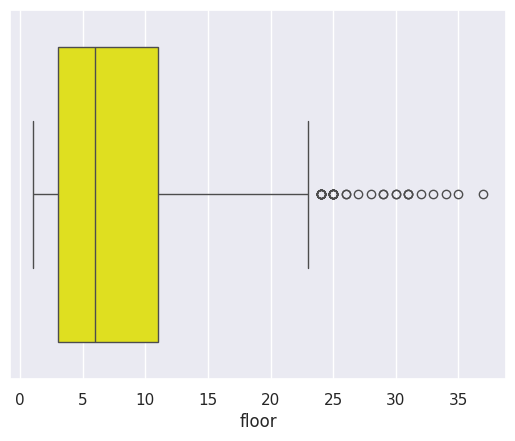

In [ ]:
sns.boxplot(x=df_c['floor'], color = 'yellow')

Выводим 4 самых правых значения (строчки с ними)

In [ ]:
df_c.loc[df_c['floor'].nlargest(4).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1648,1,37,37,2,48.0,42500000,2021.0,1,0,4,34.0,6.0,2.82,961,1
5908,31,35,41,1,36.6,11800000,2019.0,1,0,0,18.0,10.0,2.82,344,1
8174,15,34,46,2,78.2,23460000,2014.0,1,0,4,40.0,15.0,3.20,43,1
3026,19,33,35,4,90.8,35587445,2023.0,0,0,0,60.0,8.3,3.10,1196,1


In [ ]:
# удаляем их
df_c.drop(1648, inplace=True)
df_c.drop(5908, inplace=True)
df_c.drop(8174, inplace=True)
df_c.drop(3026, inplace=True)

<Axes: xlabel='floor'>

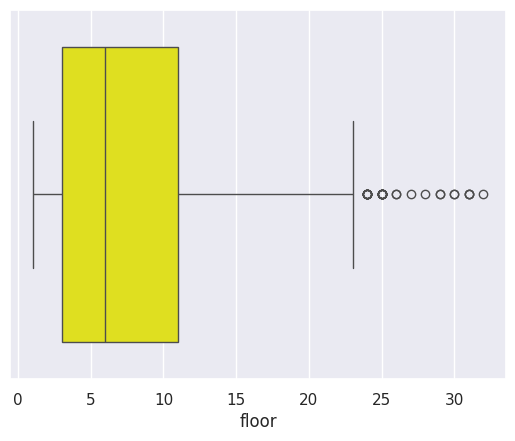

In [ ]:
sns.boxplot(x=df_c['floor'], color = 'yellow')



---


### living_meters

In [ ]:
df_c['living_meters'].describe()

,living_meters
count,3302.000000
mean,30.068892
std,15.404355
min,3.000000
25%,18.000000
50%,28.000000
75%,38.275000
max,143.070000


Макс. знач. = 179 м^2, для жилой площади в квартире значение какое-то большое

<Axes: xlabel='living_meters'>

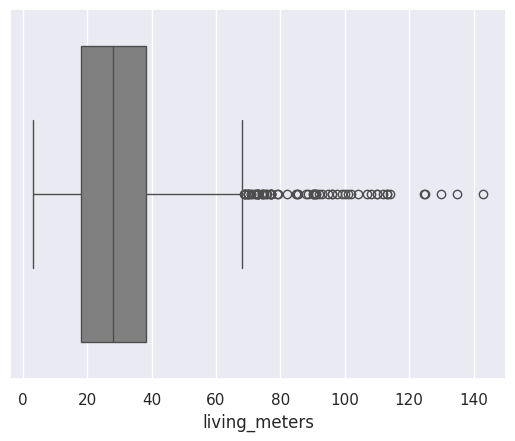

In [ ]:
sns.boxplot(x=df_c['living_meters'], color = 'grey')

Удаляем строчки, где жилая площадь больше чем 120

In [ ]:
df_c = df_c[df_c['living_meters'] < 120]

df_c['living_meters'].describe()

,living_meters
count,3297.000000
mean,29.915077
std,14.898085
min,3.000000
25%,18.000000
50%,28.000000
75%,38.100000
max,114.060000




---


### kitchen_meters


In [ ]:
df_c['kitchen_meters'].describe()

,kitchen_meters
count,3297.000000
mean,10.662132
std,5.009676
min,0.000000
25%,7.500000
50%,10.000000
75%,12.200000
max,45.000000


<Axes: xlabel='kitchen_meters'>

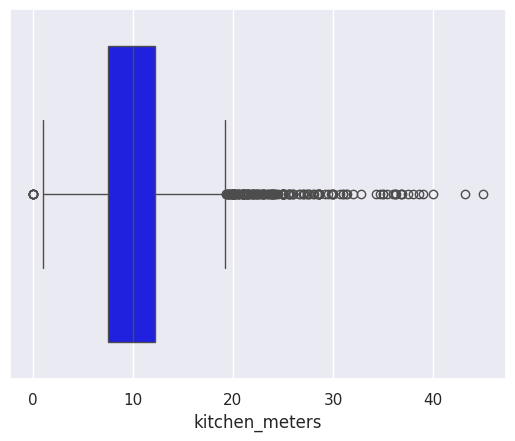

In [ ]:
sns.boxplot(x=df_c['kitchen_meters'], color = 'blue')

Удаляем строчки, где площадь кухни больше 40

In [ ]:
df_c = df_c[df_c['kitchen_meters'] <= 40]

df_c['kitchen_meters'].describe()

,kitchen_meters
count,3295.000000
mean,10.641845
std,4.942966
min,0.000000
25%,7.500000
50%,10.000000
75%,12.200000
max,40.000000


<Axes: xlabel='kitchen_meters'>

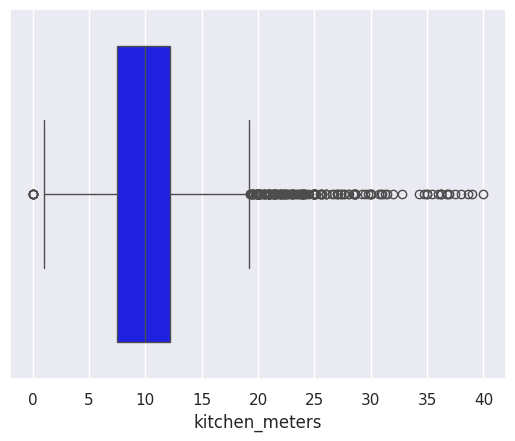

In [ ]:
# ещё раз выводим боксплот
sns.boxplot(x=df_c['kitchen_meters'], color = 'blue')



---

### price

In [ ]:
df_c['price'].describe()

,price
count,3.295000e+03
mean,9.909215e+06
std,9.211108e+06
min,1.500000e+06
25%,5.750040e+06
50%,8.000000e+06
75%,1.070000e+07
max,1.150000e+08


<Axes: xlabel='price'>

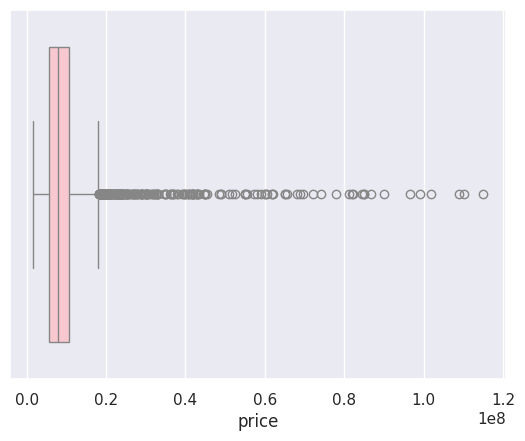

In [ ]:
sns.boxplot(x=df_c['price'], color = 'pink')

In [ ]:
# выводим 25 макс. значений
df_c.loc[df_c['price'].nlargest(25).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
593,11,9,21,3,117.00,115000000,2023.0,1,11,4,107.0,10.00,3.20,749,1
3010,19,3,5,4,123.00,110000000,2017.0,1,0,0,108.0,15.00,3.50,410,1
1139,19,3,9,4,143.00,108900000,2021.0,1,0,4,90.0,15.00,3.60,1130,1
928,19,4,6,1,59.35,101785250,2024.0,0,2,1,48.9,10.45,2.82,346,1
595,11,3,11,3,110.40,99000000,2012.0,1,0,4,90.4,20.00,3.30,659,1
3003,19,2,6,4,162.00,96500000,2005.0,1,1,4,101.0,13.00,3.00,793,1
1838,1,11,20,2,96.90,89900000,2024.0,0,0,4,48.3,16.00,2.82,881,1
166,19,17,34,3,86.70,86700000,2024.0,1,0,4,53.0,10.00,2.90,1077,1
2996,19,19,20,4,106.20,85000000,2020.0,1,0,4,63.0,6.00,3.00,488,1
3006,19,14,35,4,148.00,85000000,2003.0,1,0,4,113.0,35.00,3.20,767,1


Удаляем строки где цена больше 100000000

In [ ]:
df_c = df_c[df_c['price'] < 100000000]

df_c['price'].describe()

,price
count,3.291000e+03
mean,9.788872e+06
std,8.543248e+06
min,1.500000e+06
25%,5.750000e+06
50%,8.000000e+06
75%,1.070000e+07
max,9.900000e+07


<Axes: xlabel='price'>

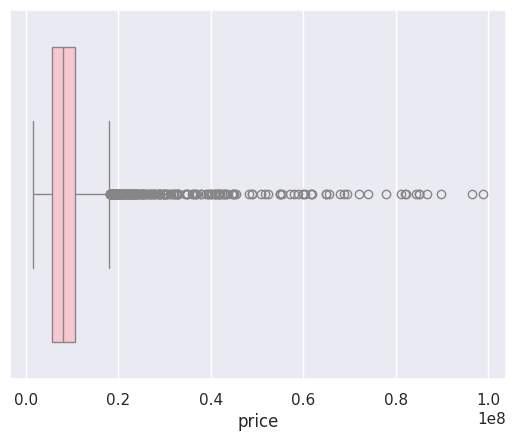

In [ ]:
# снова график
sns.boxplot(x=df_c['price'], color = 'pink')

всё что за линией идёт +- сплошным рядом(?), оставим так



---

Выводим boxplot по всем колонкам

In [ ]:
new_val_col = df_c[['floor', 'total_meters', 'price', 'living_meters', 'kitchen_meters', 'floors_count']]

<function matplotlib.pyplot.show(close=None, block=None)>

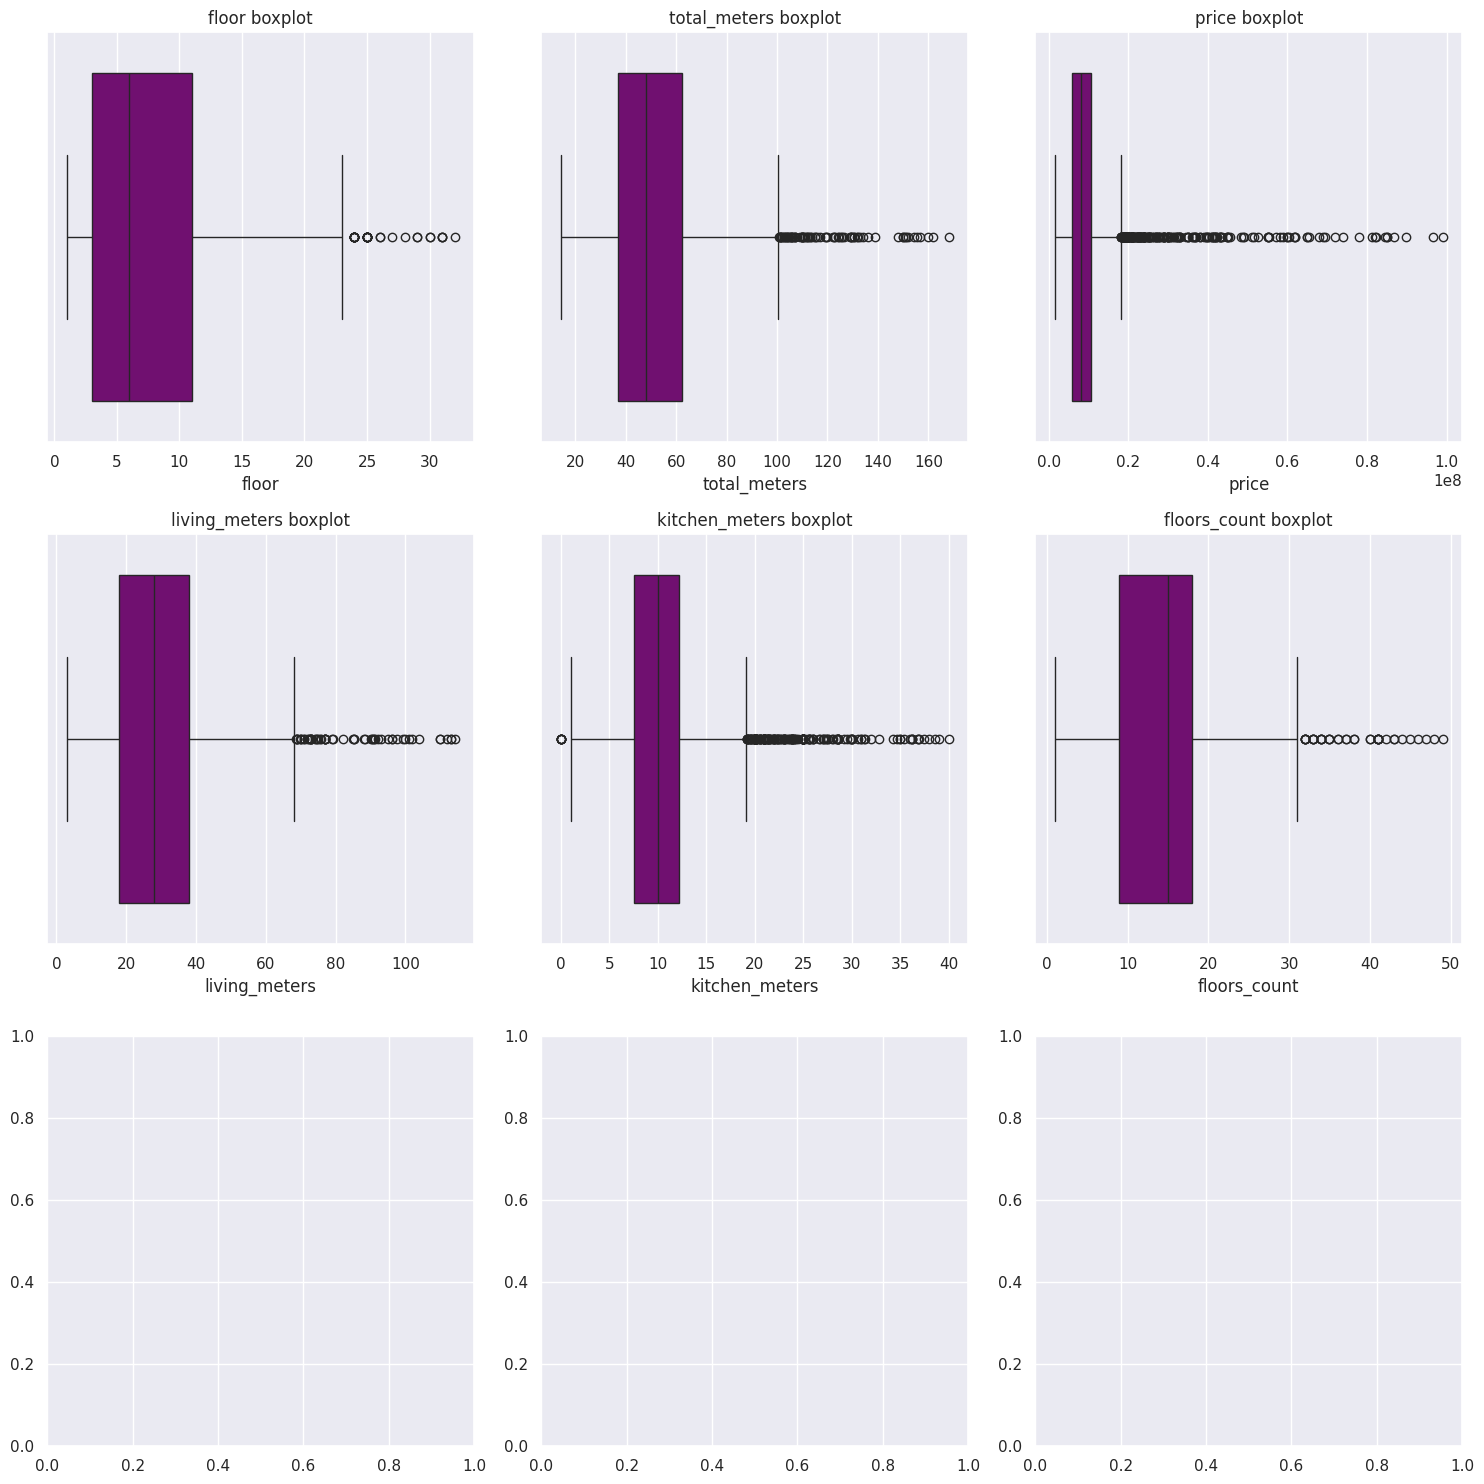

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
# создаём боксплот для каждой колонки
for i, column in enumerate(new_val_col):
  row = i//3
  col = i % 3
  sns.boxplot(x=new_val_col[column], ax = axes[row, col], color = 'purple')
  axes[row, col].set_title(f'{column} boxplot')

plt.subplots_adjust(hspace = 0.9)
plt.tight_layout()
plt.show

##Графики и анализ

In [ ]:
df_c

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1,27,1,9,1,33.0,4150000,1975.0,1,0,0,18.0,6.0,2.70,160,1
4,27,4,7,1,25.9,3000000,2009.0,1,0,2,20.0,5.0,3.50,671,0
9,27,6,9,2,42.7,3990000,1980.0,1,2,2,29.7,5.6,2.70,831,0
10,27,1,5,2,42.8,2999000,1990.0,1,1,2,24.9,6.0,2.50,711,0
13,27,1,3,1,25.3,2500000,2015.0,1,2,0,14.1,6.2,2.80,599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,20,9,10,2,53.0,9500000,2005.0,1,1,2,28.0,11.0,2.60,1255,1
8385,20,17,17,2,52.2,9850000,2013.0,1,1,2,27.0,10.9,2.80,8,1
8387,20,2,7,2,60.0,11950000,2017.0,1,0,4,35.0,18.0,2.85,1057,1
8388,20,8,14,2,69.7,11400000,2018.0,1,0,0,38.0,10.5,2.82,1238,1


Смотрим количество квартир по комнатам


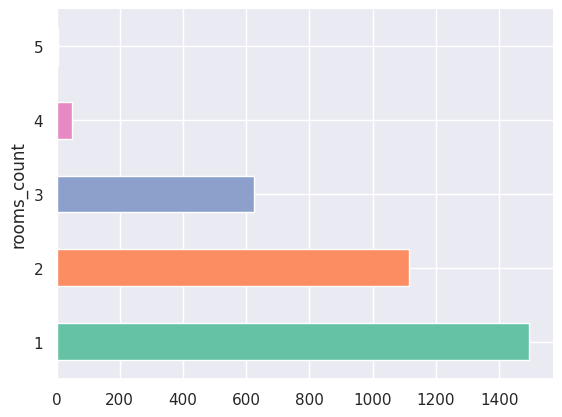

In [ ]:
df_c.groupby('rooms_count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Больше всего однокомнатных квартир, меньше всего 5-ти комнатных

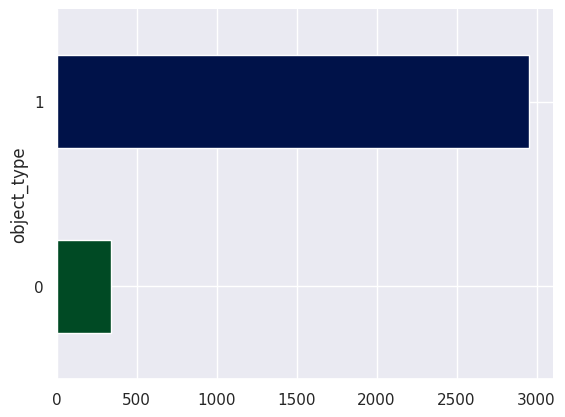

In [ ]:
df_c.groupby('object_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('ocean'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Вторичка = 1, Новостройка = 0
--> Новостроек намного меньше (примерно в 9-10 раз)

In [ ]:
 # выводим количество городов по колонке "location"
 len(df_c['location'].unique())

37

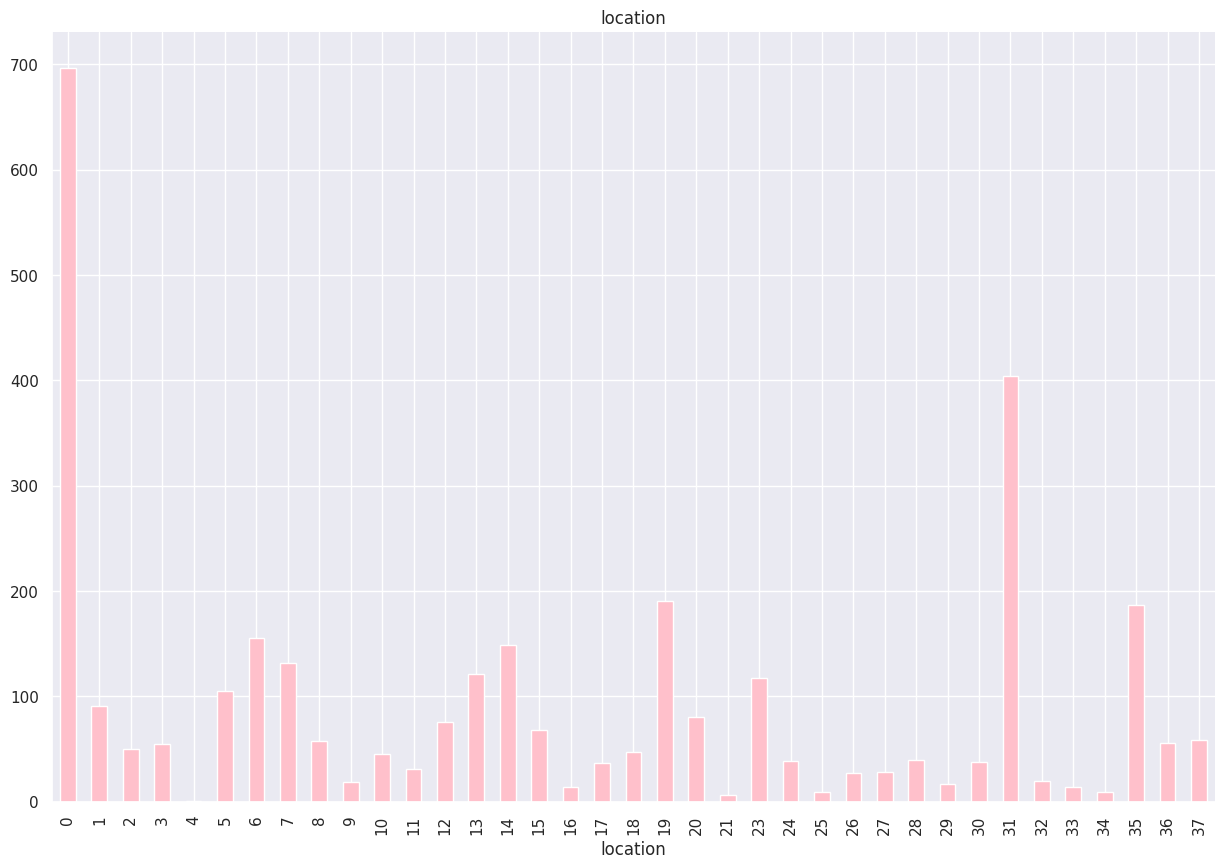

In [ ]:
plt.figure(figsize = (15,10))
df_c['location'].value_counts().sort_index().plot(kind='bar', title='location', color='pink')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

'Балашиха': 0, 'Бекасово': 1, 'Видное': 2, 'Волоколамск': 3, 'Воскресенск': 4, 'Дзержинский': 5, 'Дмитров': 6, 'Долгопрудный': 7, 'Домодедово': 8, 'Дубна': 9, 'Звенигород': 10, 'Ивантеевка': 11, 'Клин': 12, 'Королёв': 13, 'Котельники': 14, 'Красногорск': 15, 'Краснозаводск': 16, 'Лобня': 17, 'Люберцы': 18, 'Москва': 19, 'Мытищи': 20, 'Ногинск': 21, 'Одинцово': 22, 'Пересвет': 23, 'Раменское': 24, 'Реутов': 25, 'Руза': 26, 'Серпухов': 27, 'Талдом': 28, 'Троицк': 29, 'Фрязино': 30, 'Химки': 31, 'Хотьково': 32, 'Черноголовка': 33, 'Шатура': 34, 'Щёлково': 35, 'Электросталь': 36, 'Яхрома': 37

* Больше всего среди данных квартир в Балашихе и в Химках



---


## Добавляем столбик с ценой за квадратный метр

In [ ]:
df_c = df_c.assign(price_per_square_meter = df_c['price'] // df_c['total_meters'])

In [ ]:
df_c

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground,price_per_square_meter
1,27,1,9,1,33.0,4150000,1975.0,1,0,0,18.0,6.0,2.70,160,1,125757.0
4,27,4,7,1,25.9,3000000,2009.0,1,0,2,20.0,5.0,3.50,671,0,115830.0
9,27,6,9,2,42.7,3990000,1980.0,1,2,2,29.7,5.6,2.70,831,0,93442.0
10,27,1,5,2,42.8,2999000,1990.0,1,1,2,24.9,6.0,2.50,711,0,70070.0
13,27,1,3,1,25.3,2500000,2015.0,1,2,0,14.1,6.2,2.80,599,0,98814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,20,9,10,2,53.0,9500000,2005.0,1,1,2,28.0,11.0,2.60,1255,1,179245.0
8385,20,17,17,2,52.2,9850000,2013.0,1,1,2,27.0,10.9,2.80,8,1,188697.0
8387,20,2,7,2,60.0,11950000,2017.0,1,0,4,35.0,18.0,2.85,1057,1,199166.0
8388,20,8,14,2,69.7,11400000,2018.0,1,0,0,38.0,10.5,2.82,1238,1,163558.0


Text(0.5, 1.0, 'Матрица корреляции')

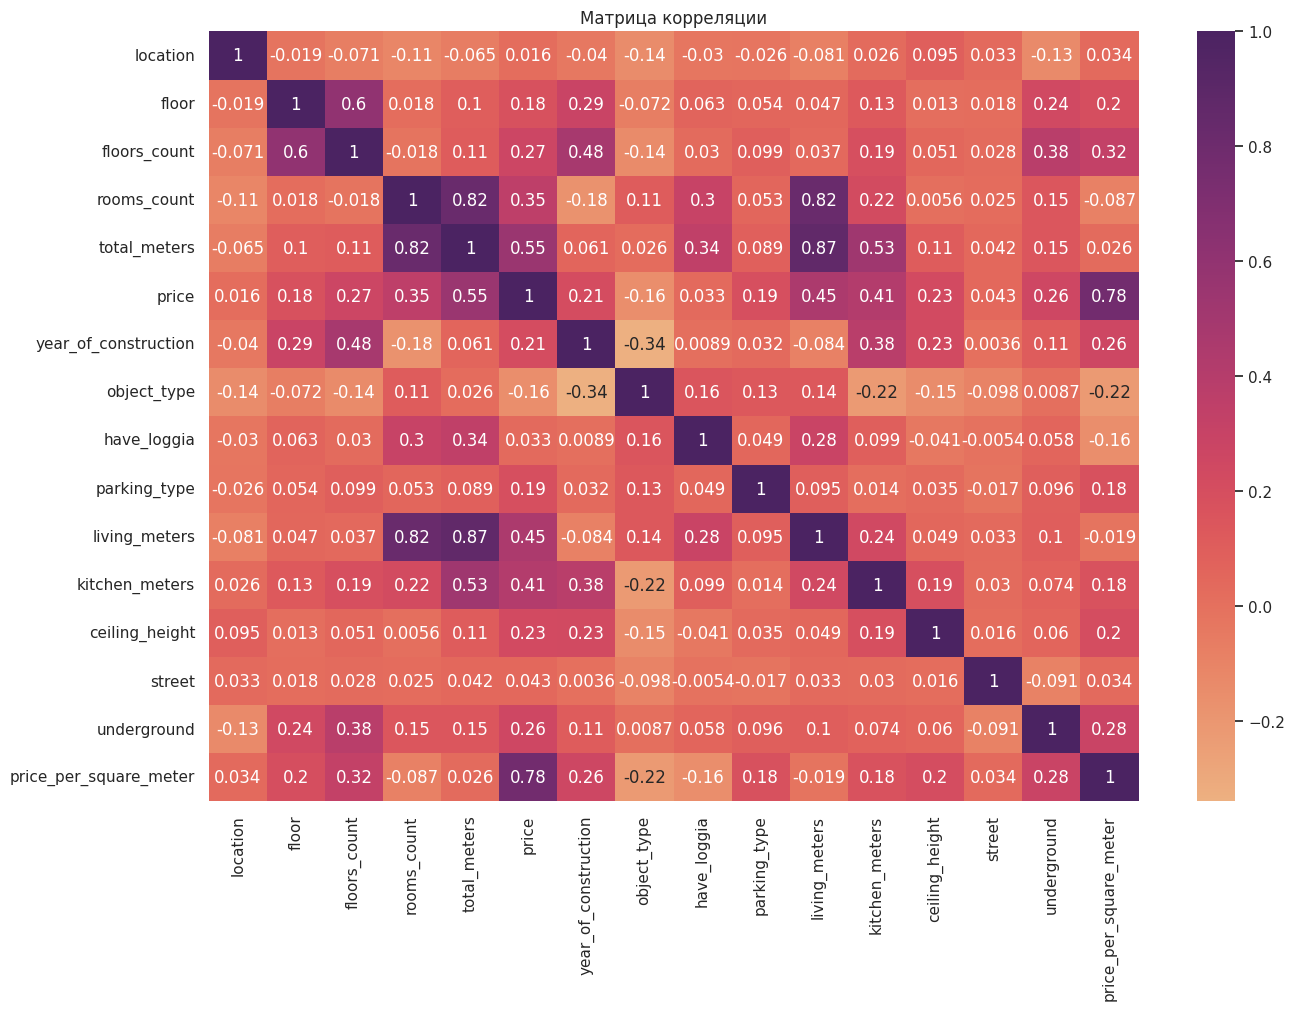

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df_c.corr(), cmap = 'flare', annot = True)
plt.title('Матрица корреляции')

Вывод по матрице корреляции  ᯓ★

* Стоимость квартиры зависит от этажа, этажности дома, года постройки, количества комнат, общей площади квартиры, площади кухни и жилой площади, высоты потолка, немного от наличия метро\мцк (0.11) + есть небольшая корреляция с типом парковки


 * Стоимость за квадратный метр зависит от этажа, этажности дома, площади (но маловато, если опираться на эту матрицу), года постройки здания, высоты потолка + от наличия парковки, но немного (0.18) + от наличия рядом метро\мцд (0.28)

 Стоимость квартиры и стоимость за квадратный метр зависят друг от друга



---

Так как для обучения модели не нужна колонка со стоимостью квартиры, удаляем её

In [ ]:
df_c.drop(['price'], axis=1,inplace=True)

In [ ]:
df_c

,location,floor,floors_count,rooms_count,total_meters,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground,price_per_square_meter
1,27,1,9,1,33.0,1975.0,1,0,0,18.0,6.0,2.70,160,1,125757.0
4,27,4,7,1,25.9,2009.0,1,0,2,20.0,5.0,3.50,671,0,115830.0
9,27,6,9,2,42.7,1980.0,1,2,2,29.7,5.6,2.70,831,0,93442.0
10,27,1,5,2,42.8,1990.0,1,1,2,24.9,6.0,2.50,711,0,70070.0
13,27,1,3,1,25.3,2015.0,1,2,0,14.1,6.2,2.80,599,0,98814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,20,9,10,2,53.0,2005.0,1,1,2,28.0,11.0,2.60,1255,1,179245.0
8385,20,17,17,2,52.2,2013.0,1,1,2,27.0,10.9,2.80,8,1,188697.0
8387,20,2,7,2,60.0,2017.0,1,0,4,35.0,18.0,2.85,1057,1,199166.0
8388,20,8,14,2,69.7,2018.0,1,0,0,38.0,10.5,2.82,1238,1,163558.0


In [ ]:
df_c.shape

(3291, 15)

После обработки данных у нас осталось 3291 строка и 15 колонок